# Data Exploration and Preparation

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Metro_Interstate_Traffic_Volume_reduced.csv')
df

,date_time,holiday,weather_main,weather_description,rain_1h,snow_1h,clouds_all,temp,traffic_volume
0,2016-07-01 00:00:00,NaN,Clear,sky is clear,0.0,0.0,1,289.04,825
1,2016-07-01 01:00:00,NaN,Clear,sky is clear,0.0,0.0,1,288.16,531
2,2016-07-01 02:00:00,NaN,Clear,sky is clear,0.0,0.0,1,286.64,381
3,2016-07-01 03:00:00,NaN,Clear,sky is clear,0.0,0.0,1,285.39,406
4,2016-07-01 04:00:00,NaN,Clear,sky is clear,0.0,0.0,1,284.67,790
...,...,...,...,...,...,...,...,...,...
23617,2018-09-30 19:00:00,NaN,Clouds,broken clouds,0.0,0.0,75,283.45,3543
23618,2018-09-30 20:00:00,NaN,Clouds,overcast clouds,0.0,0.0,90,282.76,2781
23619,2018-09-30 21:00:00,NaN,Thunderstorm,proximity thunderstorm,0.0,0.0,90,282.73,2159
23620,2018-09-30 22:00:00,NaN,Clouds,overcast clouds,0.0,0.0,90,282.09,1450


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23622 entries, 0 to 23621
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            23622 non-null  object 
 1   holiday              31 non-null     object 
 2   weather_main         23622 non-null  object 
 3   weather_description  23622 non-null  object 
 4   rain_1h              23622 non-null  float64
 5   snow_1h              23622 non-null  float64
 6   clouds_all           23622 non-null  int64  
 7   temp                 23622 non-null  float64
 8   traffic_volume       23622 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 1.6+ MB


In [50]:
df.isna().sum()

date_time                  0
holiday                23591
weather_main               0
weather_description        0
rain_1h                    0
snow_1h                    0
clouds_all                 0
temp                       0
traffic_volume             0
dtype: int64

Only the "holiday" variable has mising values so an analysis needs to be perform to infer in which circumstances these happen.

In [51]:
df.describe()

,rain_1h,snow_1h,clouds_all,temp,traffic_volume
count,23622.000000,23622.0,23622.000000,23622.000000,23622.000000
mean,0.494697,0.0,47.238252,282.525740,3245.343282
std,63.969632,0.0,39.583571,12.400988,1959.766880
min,0.000000,0.0,0.000000,243.390000,0.000000
25%,0.000000,0.0,1.000000,273.420000,1211.000000
50%,0.000000,0.0,40.000000,284.755000,3400.000000
75%,0.000000,0.0,90.000000,292.650000,4878.000000
max,9831.300000,0.0,100.000000,310.070000,7280.000000


From the previous report we conclude that the variable "snow_1h" only has one possible value: 0.0. This lack of variance sugests that it may not present predictive value when performing forecasts. Consequently, it may be removed from the data set.

In [52]:
df.describe(exclude=[np.number])

,date_time,holiday,weather_main,weather_description
count,23622,31,23622,23622
unique,19608,11,11,37
top,2018-08-24 07:00:00,Labor Day,Clear,sky is clear
freq,5,5,7027,6268


From the previous table, we see that not all values of "date_time" are unique, indicating there is more than one entry at the same day and hour in several occasions. We need to analyze why these happens.

It is important to remember that the time interval of the data set is from July 2016 to September 2018, so not all holidays have the same frequency. Still, an analysis of these variable needs to be done, since the total values count is only 31. This number should be much higher, since all the 24 data entries for the day the holiday takes place, should be have the holiday value present, which seems to not be happening.

The "weather_main" and "weather_description" seem to be coherent to their definition, not having any missing values.

In [53]:
# Get all the possible values of the 'holiday' column
print(df['holiday'].value_counts())

holiday
Labor Day                    5
Martin Luther King Jr Day    5
Independence Day             3
State Fair                   3
Christmas Day                3
Veterans Day                 2
Columbus Day                 2
Thanksgiving Day             2
New Years Day                2
Washingtons Birthday         2
Memorial Day                 2
Name: count, dtype: int64


By obtaining the possible values of the "holiday" column and their frequency, we see which are the considered holidays and what their distribution is. We will take the "Labor Day" as an example and explore it.

In [54]:
df[df['holiday'] == 'Labor Day']

,date_time,holiday,weather_main,weather_description,rain_1h,snow_1h,clouds_all,temp,traffic_volume
1737,2016-09-05 00:00:00,Labor Day,Rain,moderate rain,1.52,0.0,90,293.17,1064
1738,2016-09-05 00:00:00,Labor Day,Thunderstorm,proximity thunderstorm,1.52,0.0,90,293.17,1064
12300,2017-09-04 00:00:00,Labor Day,Clear,sky is clear,0.00,0.0,1,295.54,1026
22748,2018-09-03 00:00:00,Labor Day,Rain,light rain,0.25,0.0,1,292.43,962
22749,2018-09-03 00:00:00,Labor Day,Mist,mist,0.25,0.0,1,292.43,962


As we have remarked previously, there is more than one record for the same "date_time". In this case, the only differences between both records are present in the "weather_main" and "weather_description" columns. This may suggest that different sensors registered or classified the weather conditions differently at the same time.

Taking the day "2016-09-05" as an example, which is the first "Labor Day" recorded in the data set, we will check how the data was recorded in that day

In [55]:
# Get all entries when date_time has '2016-09-05' present in it
print("Size:", df[df['date_time'].str.contains('2016-09-05')].shape)
df[df['date_time'].str.contains('2016-09-05')]

Size: (40, 9)


,date_time,holiday,weather_main,weather_description,rain_1h,snow_1h,clouds_all,temp,traffic_volume
1737,2016-09-05 00:00:00,Labor Day,Rain,moderate rain,1.52,0.0,90,293.17,1064
1738,2016-09-05 00:00:00,Labor Day,Thunderstorm,proximity thunderstorm,1.52,0.0,90,293.17,1064
1739,2016-09-05 01:00:00,NaN,Rain,moderate rain,1.40,0.0,40,292.22,537
1740,2016-09-05 01:00:00,NaN,Thunderstorm,proximity thunderstorm,1.40,0.0,40,292.22,537
1741,2016-09-05 02:00:00,NaN,Rain,light rain,0.25,0.0,1,292.39,369
1742,2016-09-05 02:00:00,NaN,Thunderstorm,proximity thunderstorm,0.25,0.0,1,292.39,369
1743,2016-09-05 03:00:00,NaN,Thunderstorm,thunderstorm with heavy rain,0.00,0.0,1,292.94,250
1744,2016-09-05 03:00:00,NaN,Rain,light rain,0.00,0.0,1,292.94,250
1745,2016-09-05 04:00:00,NaN,Rain,heavy intensity rain,10.16,0.0,90,292.15,278
1746,2016-09-05 04:00:00,NaN,Thunderstorm,thunderstorm with heavy rain,10.16,0.0,90,292.15,278


With the previous information, we conclude that most hours have more than one record.

We see that only the midnight record has a "holiday" value.

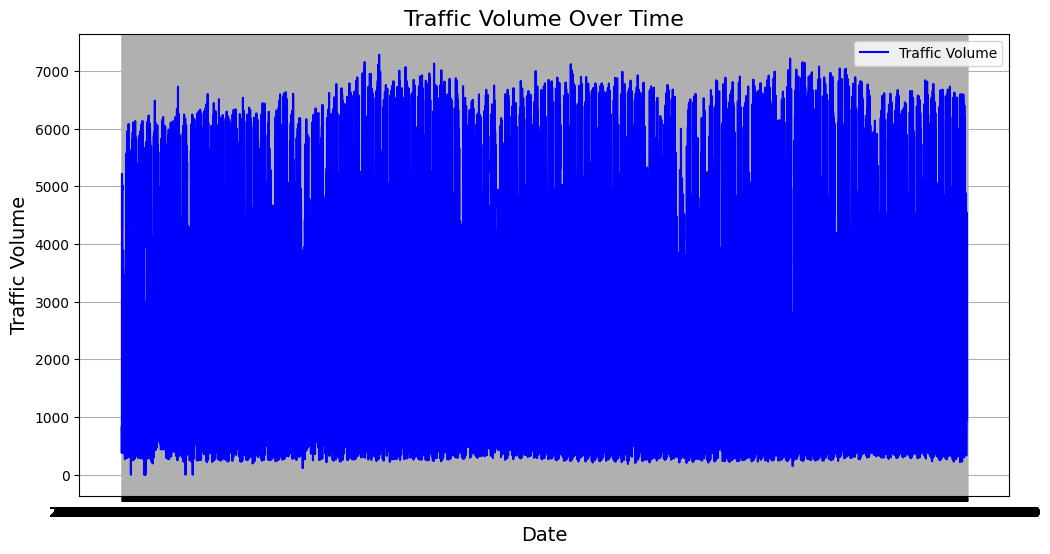

In [56]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['date_time'], df['traffic_volume'], label='Traffic Volume', color='blue')
plt.title('Traffic Volume Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Traffic Volume', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Data Pre-Processing

In [57]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume_reduced.csv')
# Convert date_time to datetime type
df['date_time'] = pd.to_datetime(df['date_time'])
# Get all the possible values of the 'holiday' column
df['holiday'].value_counts(dropna=False)
df.drop(columns=['snow_1h'], inplace=True)

We have an issue where only the first hour of the day on the holidays has the column holiday filled. We need to fill the rest of the day with the same value.

In [58]:
# Create a date column for easier grouping
df['date'] = df['date_time'].dt.date

# For each date with a holiday, propagate that holiday value to all rows of that date
holiday_dates = df[df['holiday'].notna()][['date', 'holiday']].drop_duplicates()
holiday_dict = dict(zip(holiday_dates['date'], holiday_dates['holiday']))

# Fill in the holiday values
df['holiday'] = df['date'].map(holiday_dict)

# Remove the temporary date column if you don't need it
df = df.drop('date', axis=1)

df['holiday'].value_counts(dropna=False)


holiday
NaN                          22877
Labor Day                      111
Martin Luther King Jr Day       84
Independence Day                78
State Fair                      72
Thanksgiving Day                66
New Years Day                   66
Washingtons Birthday            65
Christmas Day                   54
Memorial Day                    54
Veterans Day                    48
Columbus Day                    47
Name: count, dtype: int64

We have certain days where we have less than 24 rows meaning there are days without all values
In this case we should generate rows to fill those hours based on the average value for the same hour in the previous week value and the next week value.
The rain_1h and clouds_all should have the average value of the row before and after the missing row.
The weather_main and weather_description should be the values from the previous row.

In [59]:
# Remove duplicates, keeping the first occurrence
df = df.drop_duplicates(subset=["date_time"], keep="first")

# First ensure date_time is our index
df = df.set_index("date_time").sort_index()

# Create a complete date range
date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq="h")

# Identify missing timestamps
missing_timestamps = date_range.difference(df.index)

print(f"Number of missing timestamps: {len(missing_timestamps)}")

# Create DataFrame for missing timestamps
missing_df = pd.DataFrame(index=missing_timestamps, columns=df.columns)

# For each missing timestamp, calculate values
for timestamp in missing_timestamps:
    # Get same hour from previous and next week
    prev_week = timestamp - pd.Timedelta(weeks=1)
    next_week = timestamp + pd.Timedelta(weeks=1)

    # Get values for same hour from prev and next week if they exist
    prev_week_value = df[df.index == prev_week]["traffic_volume"].values
    next_week_value = df[df.index == next_week]["traffic_volume"].values

    # Calculate average traffic volume
    values_to_average = []
    if len(prev_week_value) > 0:
        values_to_average.append(prev_week_value[0])
    if len(next_week_value) > 0:
        values_to_average.append(next_week_value[0])

    if values_to_average:
        avg_traffic = np.mean(values_to_average)
    else:
        # If no values available, use the mean traffic for that hour across all days
        hour = timestamp.hour
        avg_traffic = df[df.index.hour == hour]["traffic_volume"].mean()

    # Fill in traffic and temperature
    missing_df.loc[timestamp, "traffic_volume"] = int(avg_traffic)
    missing_df.loc[timestamp, "temp"] = df["temp"].mean()

    # Get the rows immediately before and after the missing timestamp
    prev_row = (
        df[df.index < timestamp].iloc[-1] if len(df[df.index < timestamp]) > 0 else None
    )
    next_row = (
        df[df.index > timestamp].iloc[0] if len(df[df.index > timestamp]) > 0 else None
    )

    # Calculate average of rain_1h and clouds_all from adjacent rows
    if prev_row is not None and next_row is not None:
        missing_df.loc[timestamp, "rain_1h"] = (
            prev_row["rain_1h"] + next_row["rain_1h"]
        ) / 2
        missing_df.loc[timestamp, "clouds_all"] = int(
            (prev_row["clouds_all"] + next_row["clouds_all"]) / 2
        )
    elif prev_row is not None:
        missing_df.loc[timestamp, "rain_1h"] = prev_row["rain_1h"]
        missing_df.loc[timestamp, "clouds_all"] = prev_row["clouds_all"]
    elif next_row is not None:
        missing_df.loc[timestamp, "rain_1h"] = next_row["rain_1h"]
        missing_df.loc[timestamp, "clouds_all"] = next_row["clouds_all"]
    else:
        missing_df.loc[timestamp, "rain_1h"] = 0
        missing_df.loc[timestamp, "clouds_all"] = int(df["clouds_all"].mean())

    # Use weather values from previous row
    if prev_row is not None:
        missing_df.loc[timestamp, "weather_main"] = prev_row["weather_main"]
        missing_df.loc[timestamp, "weather_description"] = prev_row[
            "weather_description"
        ]
    else:
        missing_df.loc[timestamp, "weather_main"] = (
            next_row["weather_main"]
            if next_row is not None
            else df["weather_main"].mode()[0]
        )
        missing_df.loc[timestamp, "weather_description"] = (
            next_row["weather_description"]
            if next_row is not None
            else df["weather_description"].mode()[0]
        )

    # Fill holiday based on the date
    date = timestamp.date()
    if date in holiday_dict:
        missing_df.loc[timestamp, "holiday"] = holiday_dict[date]
    else:
        missing_df.loc[timestamp, "holiday"] = None

# Combine original and missing data
df_complete = pd.concat([df, missing_df])
df_complete = df_complete.sort_index()

# Verify we now have 24 hours for each day
days_hours = df_complete.groupby(df_complete.index.date).size()
print("\nNumber of hours per day after filling:")
print(days_hours.value_counts())

Number of missing timestamps: 120

Number of hours per day after filling:
24    822
Name: count, dtype: int64


In [60]:
# create a column that indicates the day of the week
df_complete['day_of_week'] = df_complete.index.dayofweek.map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})
df_complete

,holiday,weather_main,weather_description,rain_1h,clouds_all,temp,traffic_volume,day_of_week
2016-07-01 00:00:00,NaN,Clear,sky is clear,0.0,1,289.04,825,Friday
2016-07-01 01:00:00,NaN,Clear,sky is clear,0.0,1,288.16,531,Friday
2016-07-01 02:00:00,NaN,Clear,sky is clear,0.0,1,286.64,381,Friday
2016-07-01 03:00:00,NaN,Clear,sky is clear,0.0,1,285.39,406,Friday
2016-07-01 04:00:00,NaN,Clear,sky is clear,0.0,1,284.67,790,Friday
...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,NaN,Clouds,broken clouds,0.0,75,283.45,3543,Sunday
2018-09-30 20:00:00,NaN,Clouds,overcast clouds,0.0,90,282.76,2781,Sunday
2018-09-30 21:00:00,NaN,Thunderstorm,proximity thunderstorm,0.0,90,282.73,2159,Sunday
2018-09-30 22:00:00,NaN,Clouds,overcast clouds,0.0,90,282.09,1450,Sunday


In [61]:
# Fill missing holiday values with 'no_holiday'
df_complete['holiday'] = df_complete['holiday'].fillna('no_holiday')
df_complete['holiday'].value_counts()

holiday
no_holiday                   19128
Independence Day                72
State Fair                      72
Labor Day                       72
Columbus Day                    48
Veterans Day                    48
Thanksgiving Day                48
Christmas Day                   48
New Years Day                   48
Martin Luther King Jr Day       48
Washingtons Birthday            48
Memorial Day                    48
Name: count, dtype: int64

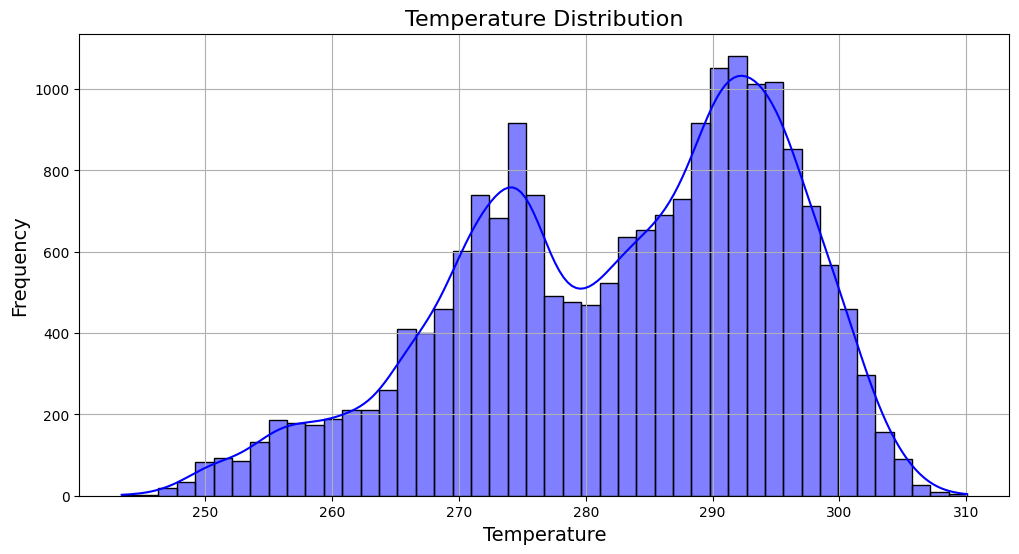

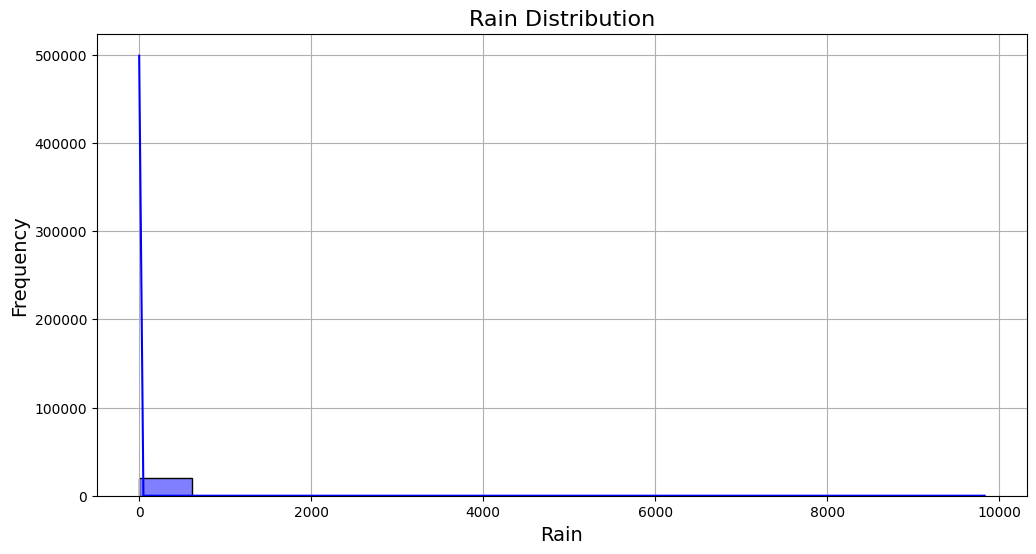

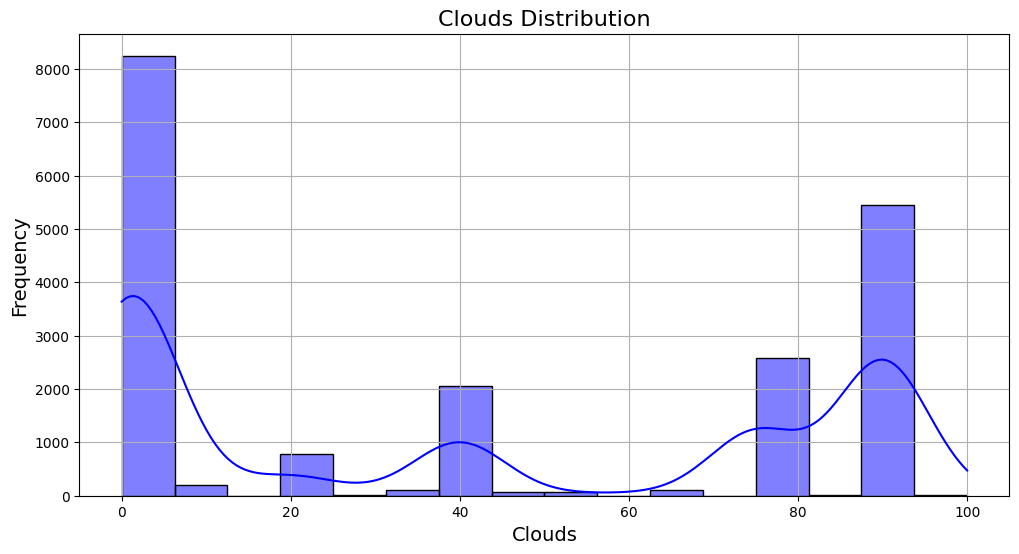

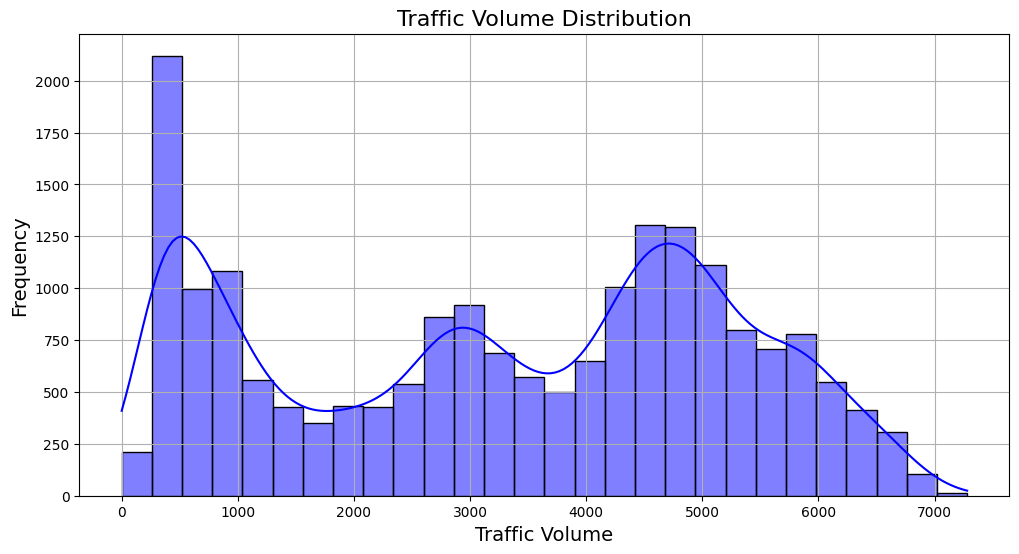

In [62]:
# Plot the distribution of each numerical feature
plt.figure(figsize=(12, 6))
sns.histplot(df_complete['temp'], kde=True, color='blue')
plt.title('Temperature Distribution', fontsize=16)
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)

plt.figure(figsize=(12, 6))
sns.histplot(df_complete['rain_1h'], kde=True, color='blue')
plt.title('Rain Distribution', fontsize=16)
plt.xlabel('Rain', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)

plt.figure(figsize=(12, 6))
sns.histplot(df_complete['clouds_all'], kde=True, color='blue')
plt.title('Clouds Distribution', fontsize=16)
plt.xlabel('Clouds', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)

plt.figure(figsize=(12, 6))
sns.histplot(df_complete['traffic_volume'], kde=True, color='blue')
plt.title('Traffic Volume Distribution', fontsize=16)
plt.xlabel('Traffic Volume', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)

<Axes: xlabel='holiday', ylabel='traffic_volume'>

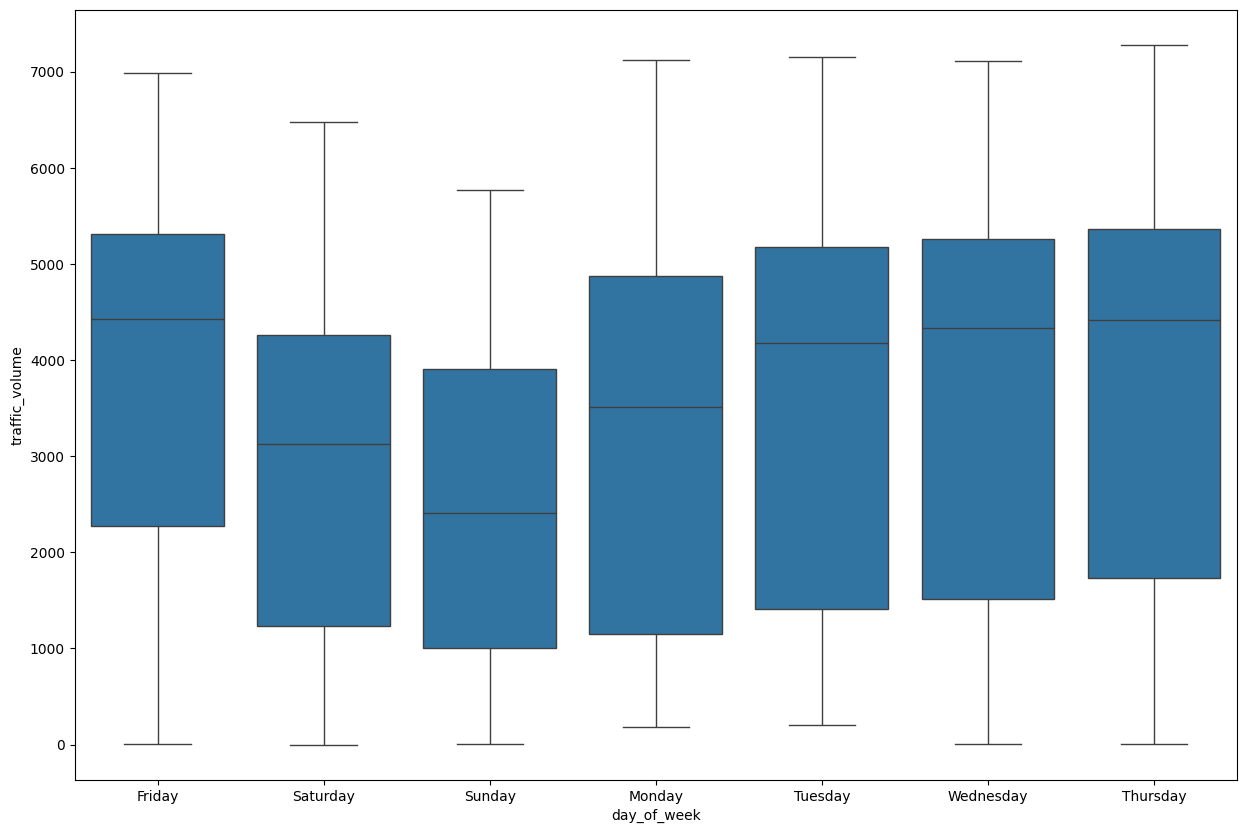

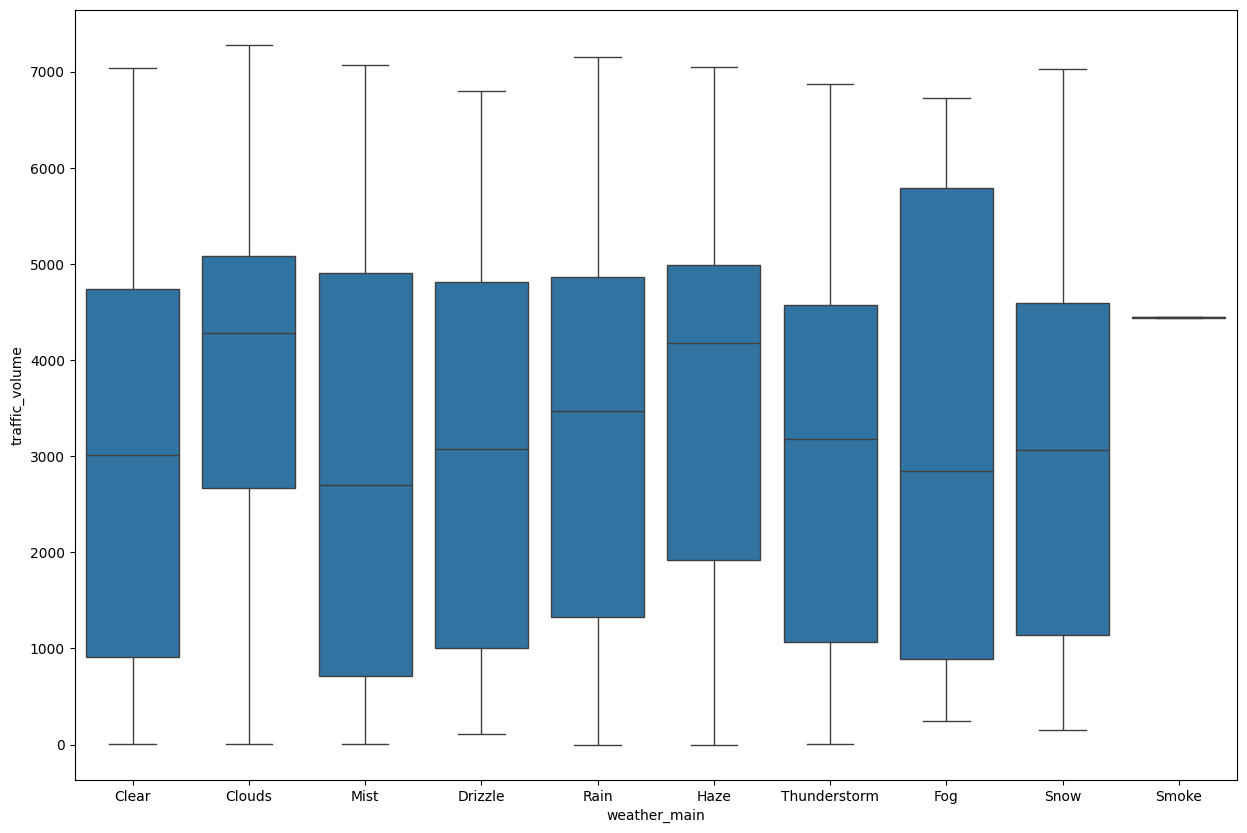

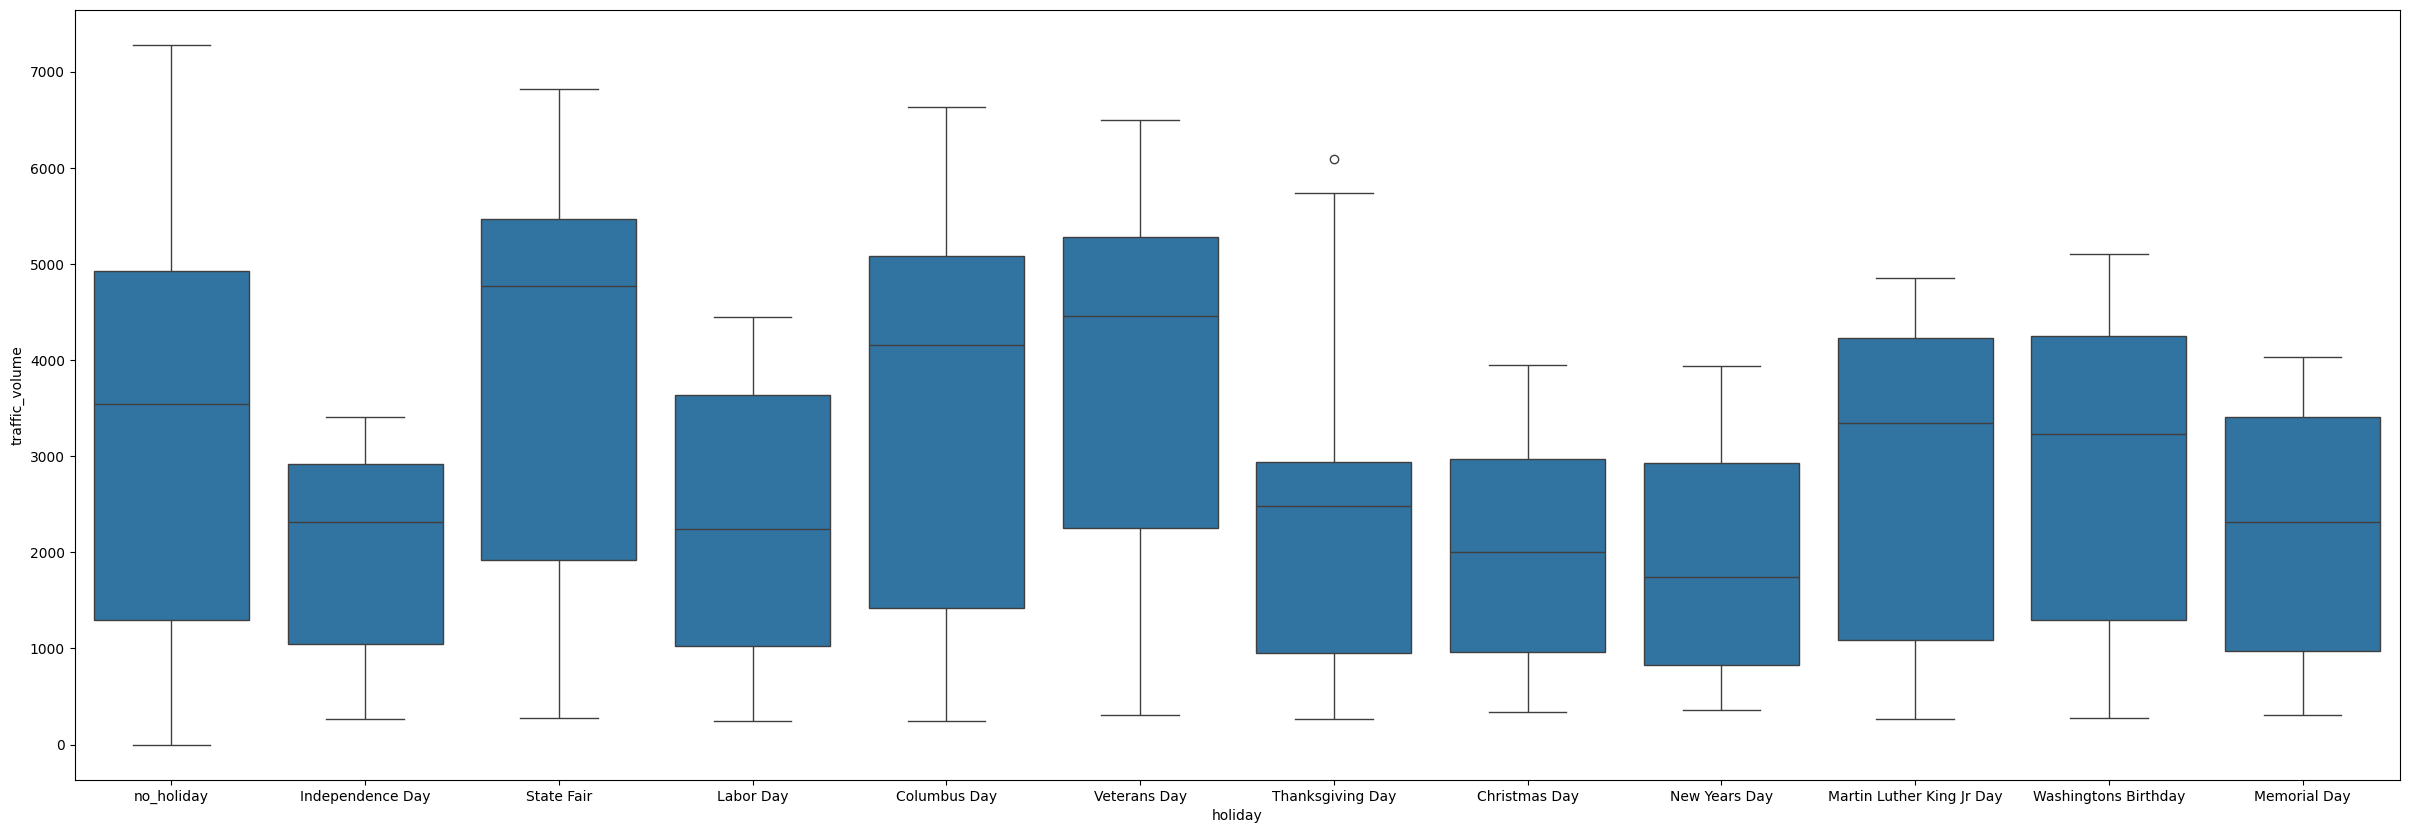

In [63]:
# Plot the distribution of traffic volume by day of the week
plt.figure(figsize=(15, 10))
sns.boxplot(x='day_of_week', y='traffic_volume', data=df_complete)

# Plot the distribution of traffic volume by weather_main
plt.figure(figsize=(15, 10))
sns.boxplot(x='weather_main', y='traffic_volume', data=df_complete)

# Plot the distribution of traffic volume by holiday
plt.figure(figsize=(30, 10))
sns.boxplot(x='holiday', y='traffic_volume', data=df_complete)

<Axes: >

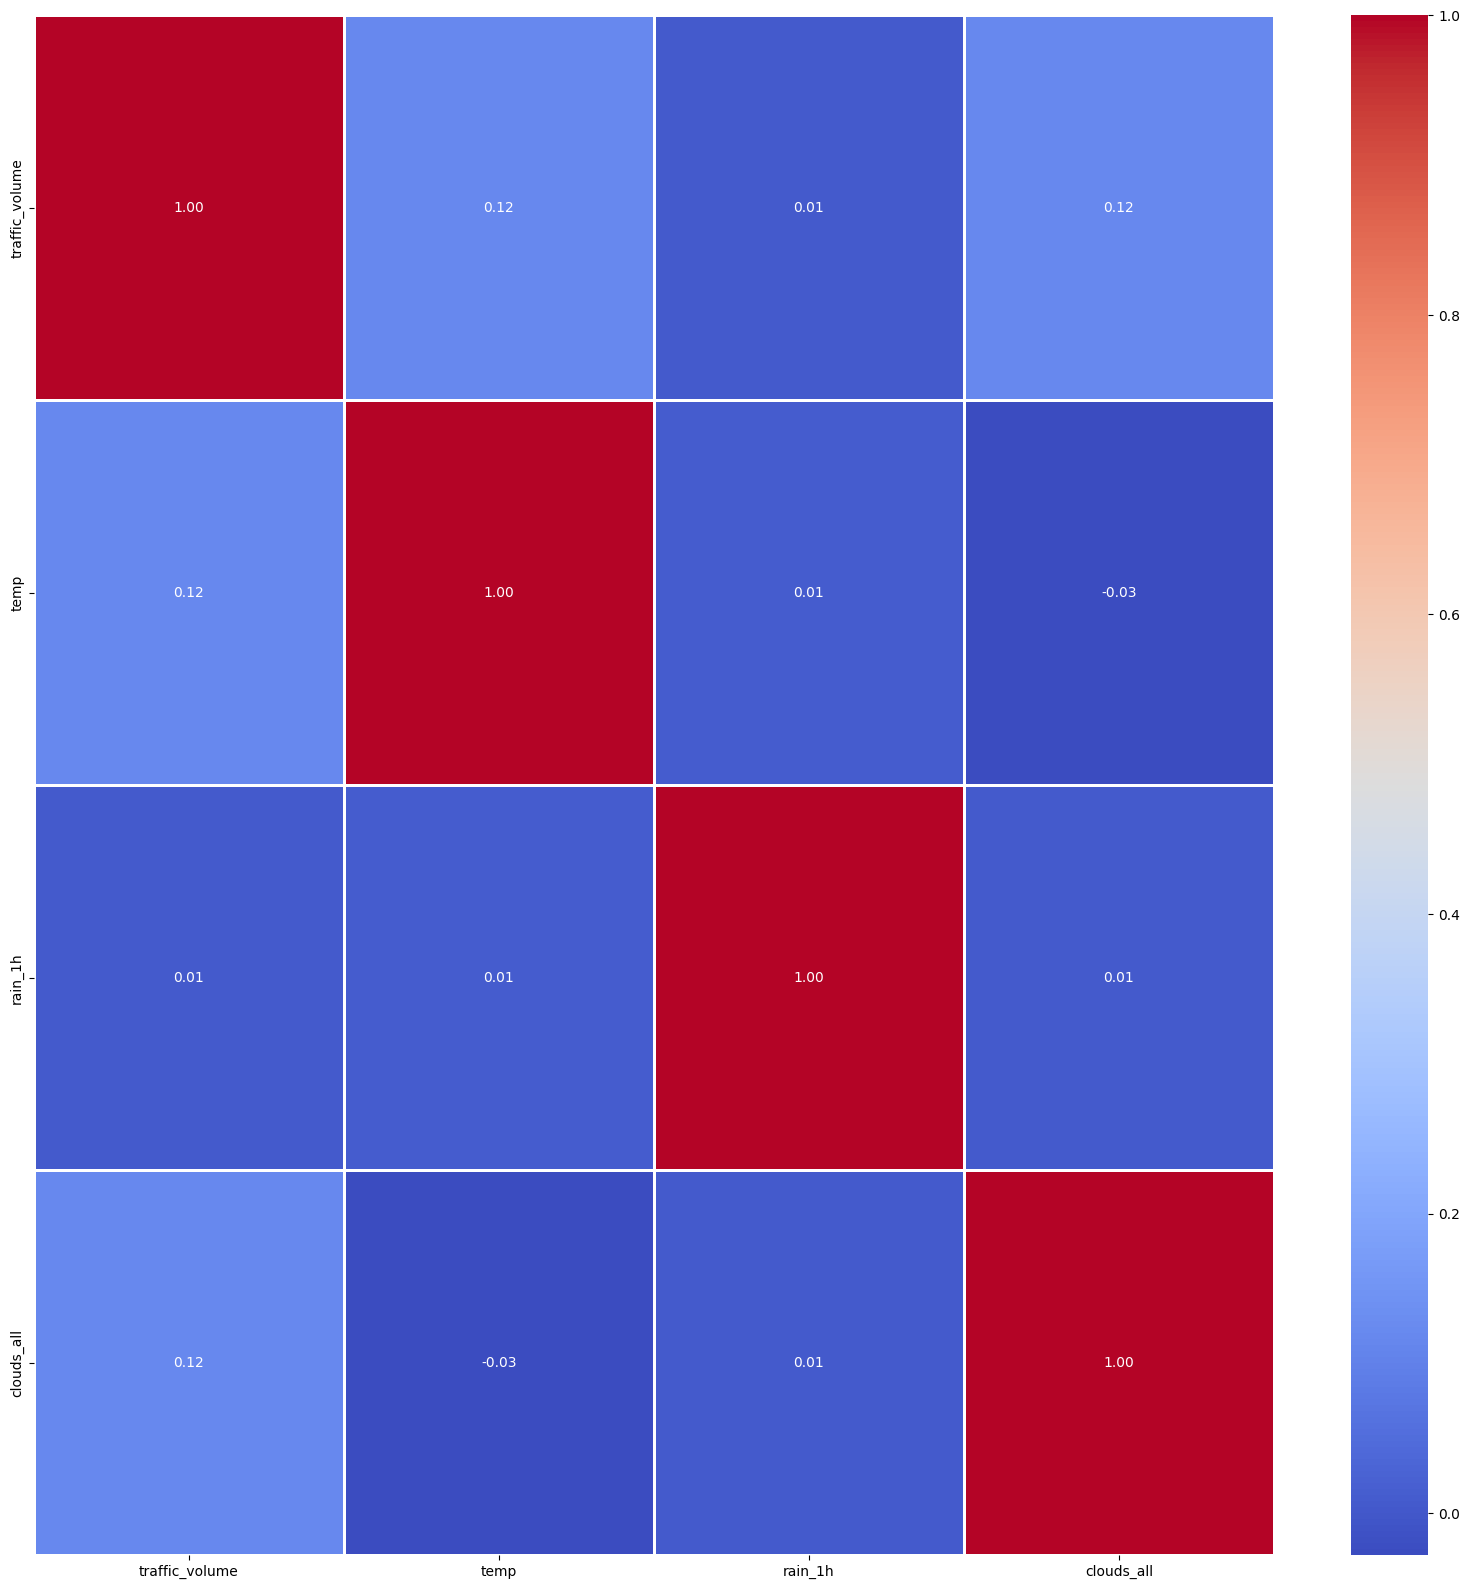

In [64]:
# Obtain the correlation matrix of numerical columns
plt.figure(figsize=(20, 20))
sns.heatmap(df_complete[['traffic_volume', 'temp', 'rain_1h', 'clouds_all']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)

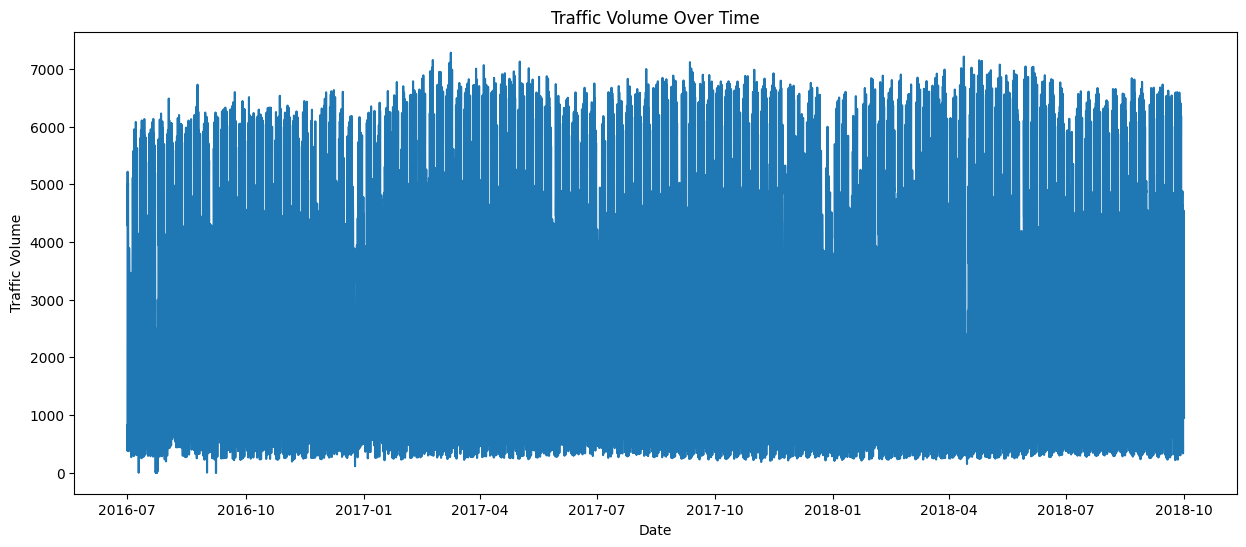

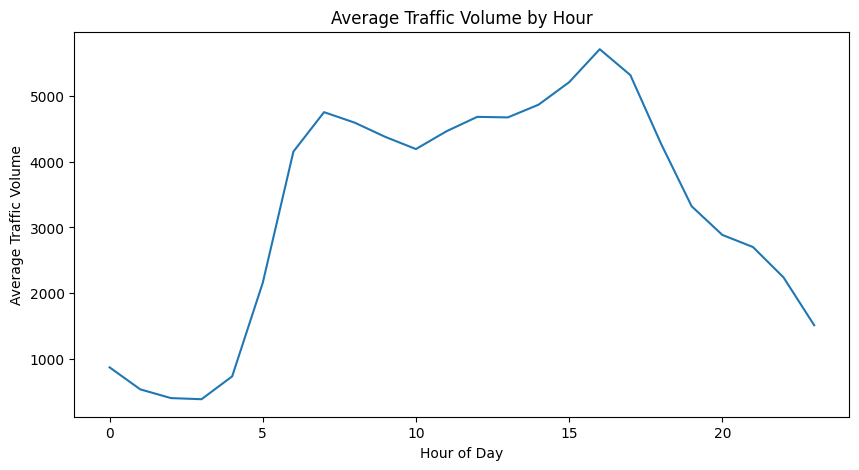

In [65]:
# Let's first create a basic time series plot to understand the patterns
plt.figure(figsize=(15, 6))
plt.plot(df_complete.index, df_complete['traffic_volume'])
plt.title('Traffic Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.show()

# Let's also look at the average daily pattern
daily_pattern = df_complete.groupby(df_complete.index.hour)['traffic_volume'].mean()
plt.figure(figsize=(10, 5))
plt.plot(daily_pattern.index, daily_pattern.values)
plt.title('Average Traffic Volume by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Volume')
plt.show()

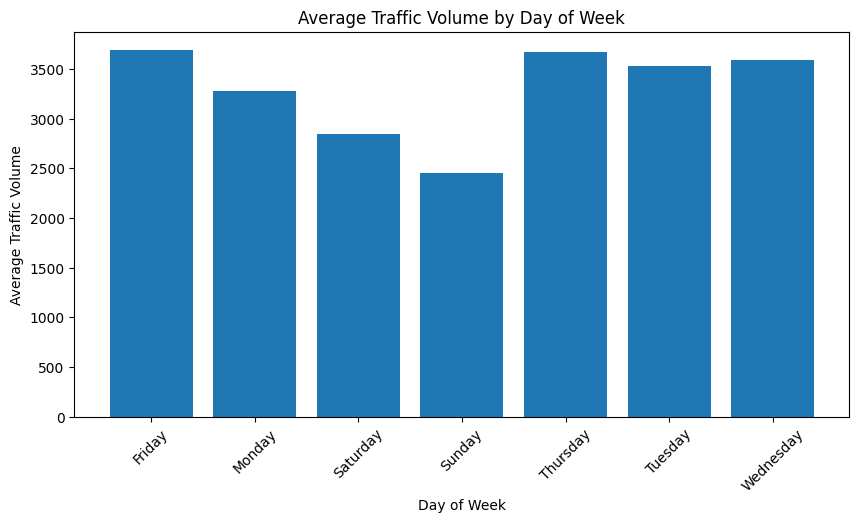

/tmp/ipykernel_1803/1236392187.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  traffic_series = df_complete['traffic_volume'].resample('H').mean()


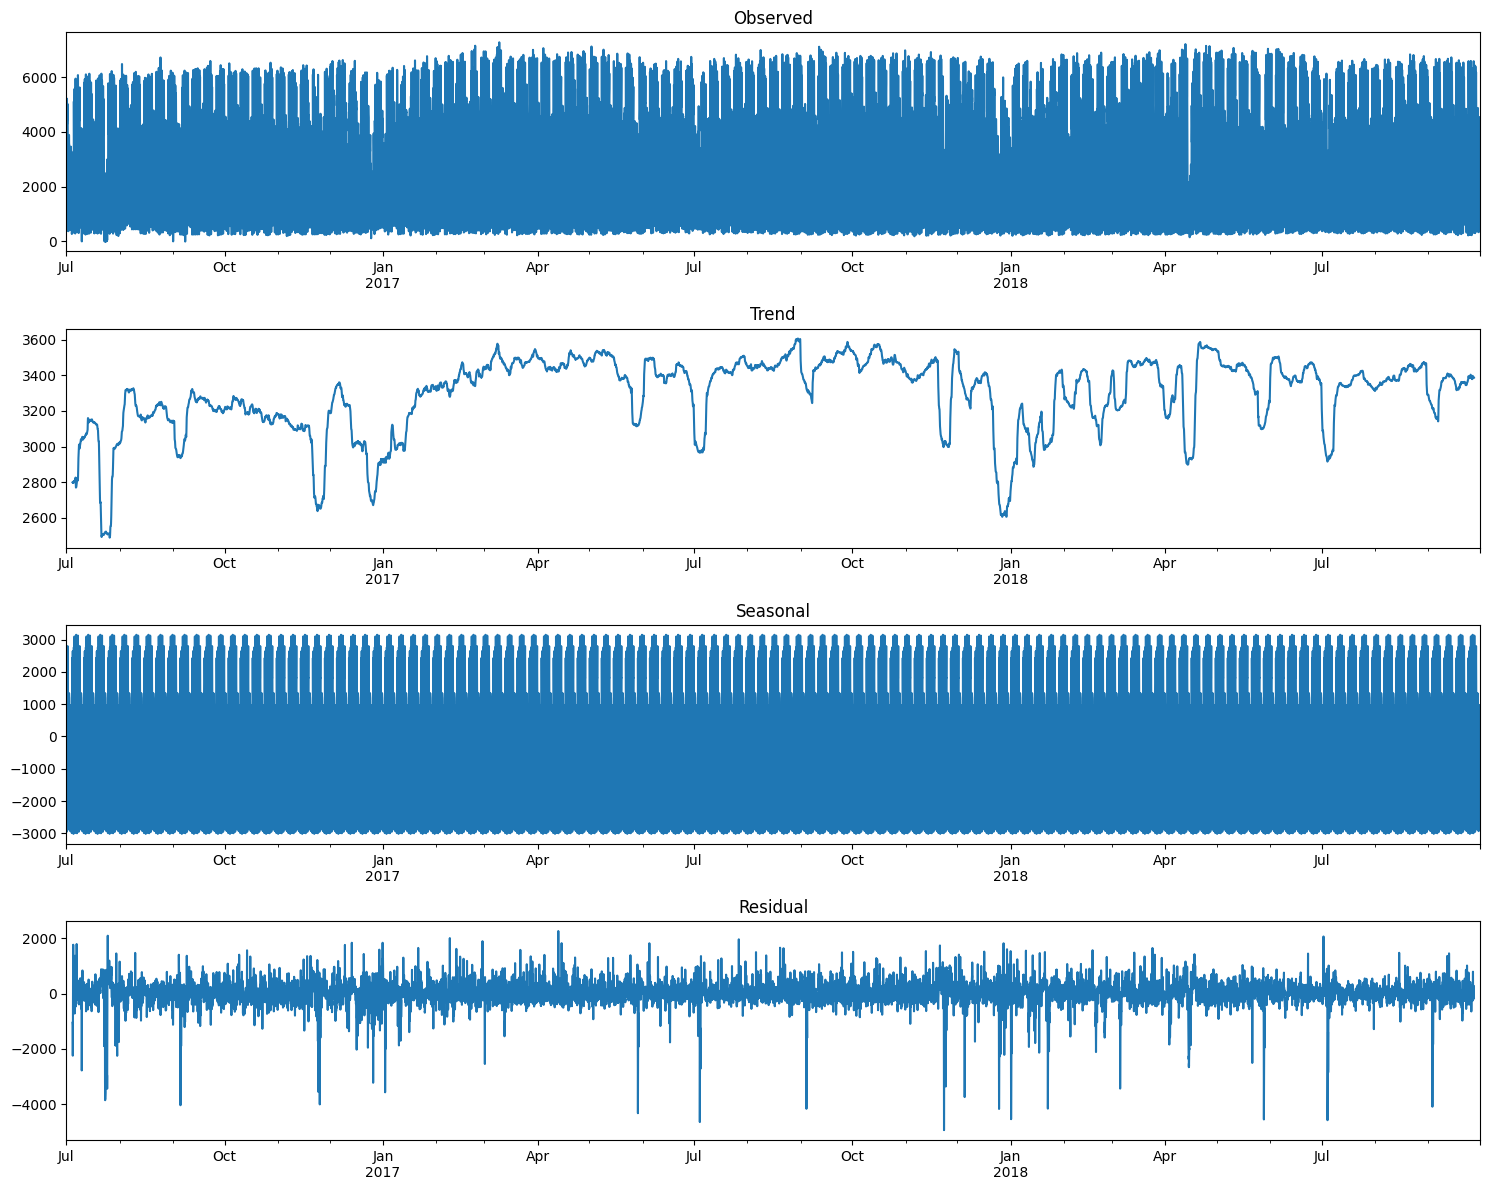

In [66]:
# And weekly pattern
weekly_pattern = df_complete.groupby('day_of_week')['traffic_volume'].mean()
plt.figure(figsize=(10, 5))
plt.bar(weekly_pattern.index, weekly_pattern.values)
plt.title('Average Traffic Volume by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=45)
plt.show()

# Let's also perform decomposition to see trend, seasonality, and residuals
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample to hourly frequency to ensure regularity
traffic_series = df_complete['traffic_volume'].resample('H').mean()

# Perform decomposition
decomposition = seasonal_decompose(traffic_series, period=24*7)  # 7 days * 24 hours

# Plot decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

# Modeling

ADF Statistic: -5.655382799095882
p-value: 9.6477243879521e-07
Critical values: {'1%': np.float64(-3.4333532186762805), '5%': np.float64(-2.862866720471125), '10%': np.float64(-2.5674762791431696)}


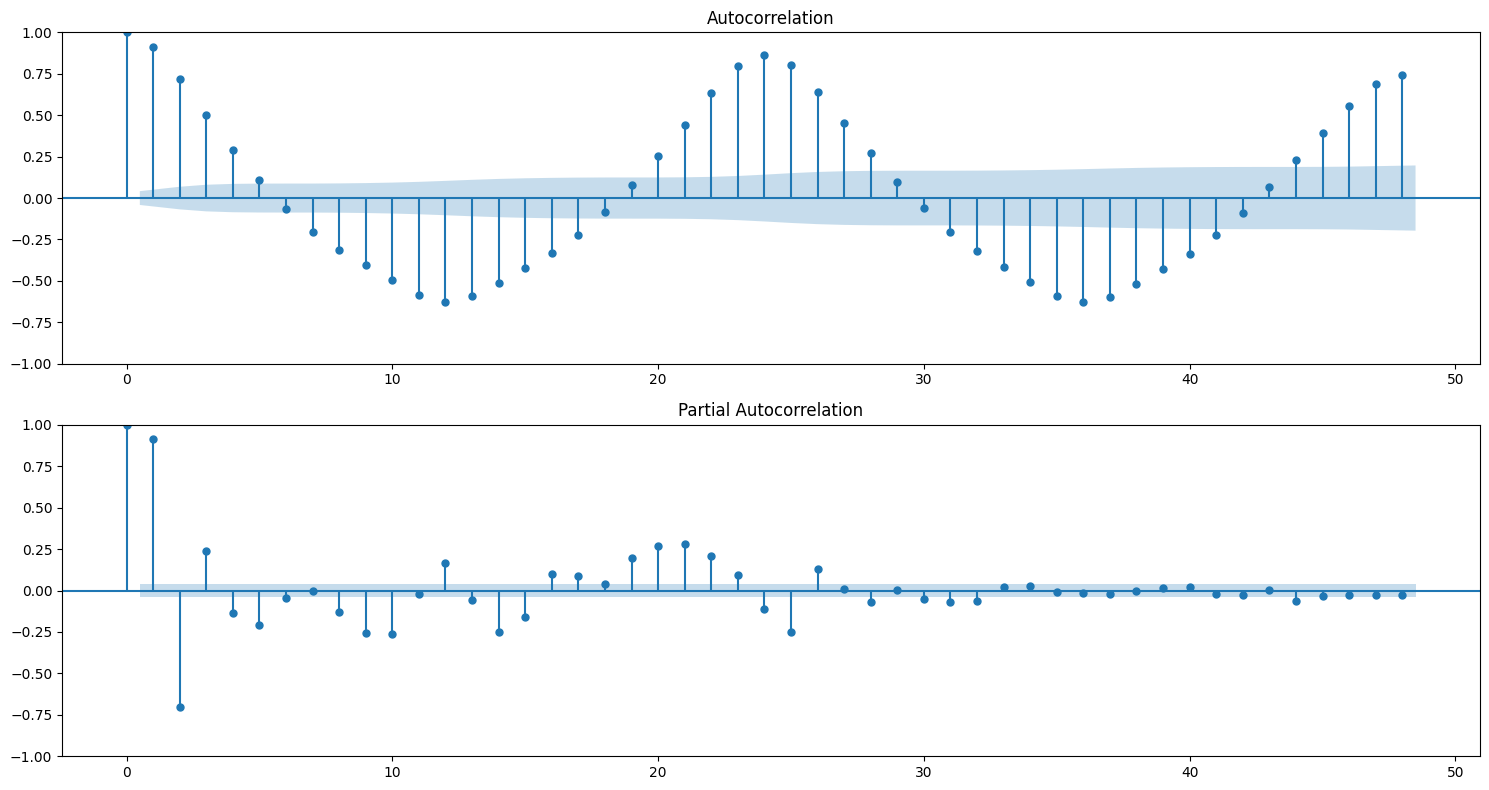

In [67]:
# First, let's take a subset of the data as mentioned in the requirements
# We'll use 3 months of data to keep it manageable for statistical models
df_subset = df_complete['2018-07-01':'2018-09-30'].copy()

# Check stationarity
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(df_subset['traffic_volume'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical values:', adf_result[4])

# Plot ACF and PACF to help determine model orders
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))
plot_acf(df_subset['traffic_volume'], lags=48, ax=ax1)  # 2 days worth of lags
plot_pacf(df_subset['traffic_volume'], lags=48, ax=ax2)
plt.tight_layout()
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.50272D+00    |proj g|=  6.95649D-01

At iterate    5    f=  7.35664D+00    |proj g|=  6.52866D-02


 This problem is unconstrained.



At iterate   10    f=  7.33593D+00    |proj g|=  5.96183D-01

At iterate   15    f=  7.31787D+00    |proj g|=  6.06732D-02

At iterate   20    f=  7.31761D+00    |proj g|=  1.17822D-02

At iterate   25    f=  7.31757D+00    |proj g|=  1.97494D-02

At iterate   30    f=  7.31756D+00    |proj g|=  2.31721D-03

At iterate   35    f=  7.31694D+00    |proj g|=  5.75496D-02

At iterate   40    f=  7.27868D+00    |proj g|=  1.36033D+00

At iterate   45    f=  7.20109D+00    |proj g|=  1.06046D+00

At iterate   50    f=  7.17528D+00    |proj g|=  2.44324D-01

At iterate   55    f=  7.17427D+00    |proj g|=  1.23198D+00

At iterate   60    f=  7.17041D+00    |proj g|=  1.08646D-01

At iterate   65    f=  7.16777D+00    |proj g|=  1.17213D-01

At iterate   70    f=  7.16775D+00    |proj g|=  3.40294D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

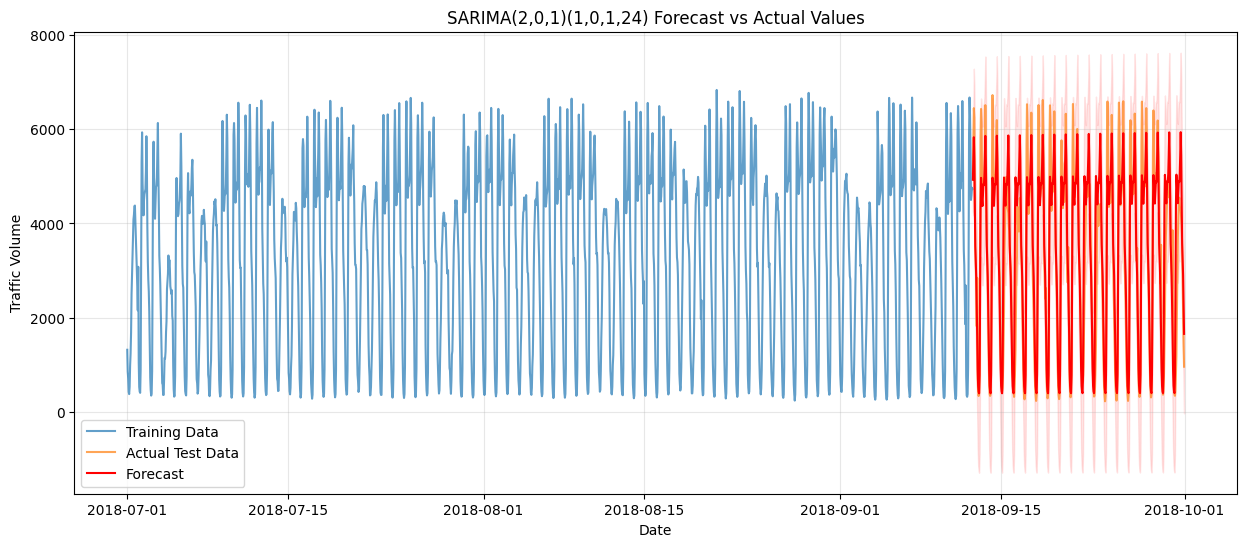


Model Performance Metrics:
Root Mean Squared Error: 872.44
Mean Absolute Error: 571.04
Mean Absolute Percentage Error: 30.74%
R-squared: 0.7978


In [68]:
# Convert all numeric columns to the correct type
df_subset['traffic_volume'] = pd.to_numeric(df_subset['traffic_volume'])
df_subset['rain_1h'] = pd.to_numeric(df_subset['rain_1h'])
df_subset['clouds_all'] = pd.to_numeric(df_subset['clouds_all'])
df_subset['temp'] = pd.to_numeric(df_subset['temp'])

# Split the data into train and test sets
train_size = int(len(df_subset) * 0.8)
train = df_subset[:train_size]
test = df_subset[train_size:]

# Define the model with just the numpy array of traffic volume
model = SARIMAX(train['traffic_volume'].values,
                order=(2, 0, 1),
                seasonal_order=(1, 0, 1, 24),
                enforce_stationarity=False,
                enforce_invertibility=False)

# Fit the model
results = model.fit(maxiter=200)  # Increased max iterations

# Make predictions
forecast = results.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(train.index, train['traffic_volume'], label='Training Data', alpha=0.7)
plt.plot(test.index, test['traffic_volume'], label='Actual Test Data', alpha=0.7)
plt.plot(test.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(test.index, 
                 forecast_ci[:, 0],  # Changed from iloc to direct indexing
                 forecast_ci[:, 1],  # Changed from iloc to direct indexing
                 color='red', alpha=0.1)
plt.title('SARIMA(2,0,1)(1,0,1,24) Forecast vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# First import the necessary metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate error metrics
mse = mean_squared_error(test['traffic_volume'], forecast_mean)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['traffic_volume'], forecast_mean)
mape = np.mean(np.abs((test['traffic_volume'] - forecast_mean) / test['traffic_volume'])) * 100

print('\nModel Performance Metrics:')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

# Calculate R-squared
ss_res = np.sum((test['traffic_volume'] - forecast_mean) ** 2)
ss_tot = np.sum((test['traffic_volume'] - np.mean(test['traffic_volume'])) ** 2)
r2 = 1 - (ss_res / ss_tot)
print(f'R-squared: {r2:.4f}')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.76624D+00    |proj g|=  4.82073D-01


 This problem is unconstrained.



At iterate    5    f=  6.62782D+00    |proj g|=  2.99814D-02

At iterate   10    f=  6.62673D+00    |proj g|=  1.41360D-02

At iterate   15    f=  6.62546D+00    |proj g|=  4.11161D-02

At iterate   20    f=  6.62477D+00    |proj g|=  7.23501D-03

At iterate   25    f=  6.62473D+00    |proj g|=  3.45534D-03

At iterate   30    f=  6.62017D+00    |proj g|=  1.56973D-01

At iterate   35    f=  6.59929D+00    |proj g|=  3.46093D-01

At iterate   40    f=  6.49628D+00    |proj g|=  7.97652D-02

At iterate   45    f=  6.31368D+00    |proj g|=  7.08064D-01

At iterate   50    f=  6.29663D+00    |proj g|=  2.52061D-02

At iterate   55    f=  6.28134D+00    |proj g|=  8.16152D-02

At iterate   60    f=  6.27397D+00    |proj g|=  2.77649D-02

At iterate   65    f=  6.27391D+00    |proj g|=  7.04957D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

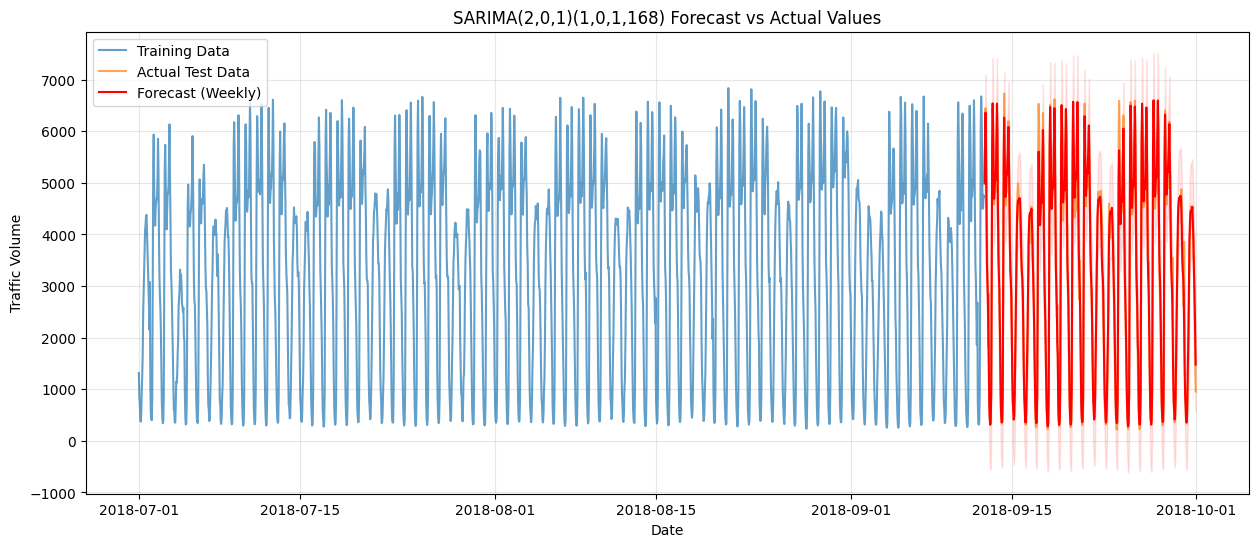


Weekly Model Performance Metrics:
Root Mean Squared Error: 288.96
Mean Absolute Error: 194.35
Mean Absolute Percentage Error: 8.44%
R-squared: 0.9778


In [69]:
# Define the model with both daily and weekly seasonality
model_weekly = SARIMAX(train['traffic_volume'].values,
                      order=(2, 0, 1),
                      seasonal_order=(1, 0, 1, 168),  # 168 hours = 1 week
                      enforce_stationarity=False,
                      enforce_invertibility=False)

# Fit the model
results_weekly = model_weekly.fit(maxiter=200)

# Make predictions
forecast_weekly = results_weekly.get_forecast(steps=len(test))
forecast_mean_weekly = forecast_weekly.predicted_mean
forecast_ci_weekly = forecast_weekly.conf_int()

# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(train.index, train['traffic_volume'], label='Training Data', alpha=0.7)
plt.plot(test.index, test['traffic_volume'], label='Actual Test Data', alpha=0.7)
plt.plot(test.index, forecast_mean_weekly, label='Forecast (Weekly)', color='red')
plt.fill_between(test.index, 
                 forecast_ci_weekly[:, 0],
                 forecast_ci_weekly[:, 1],
                 color='red', alpha=0.1)
plt.title('SARIMA(2,0,1)(1,0,1,168) Forecast vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Calculate error metrics for weekly model
mse_weekly = mean_squared_error(test['traffic_volume'], forecast_mean_weekly)
rmse_weekly = np.sqrt(mse_weekly)
mae_weekly = mean_absolute_error(test['traffic_volume'], forecast_mean_weekly)
mape_weekly = np.mean(np.abs((test['traffic_volume'] - forecast_mean_weekly) / test['traffic_volume'])) * 100

print('\nWeekly Model Performance Metrics:')
print(f'Root Mean Squared Error: {rmse_weekly:.2f}')
print(f'Mean Absolute Error: {mae_weekly:.2f}')
print(f'Mean Absolute Percentage Error: {mape_weekly:.2f}%')

# Calculate R-squared for weekly model
ss_res_weekly = np.sum((test['traffic_volume'] - forecast_mean_weekly) ** 2)
ss_tot_weekly = np.sum((test['traffic_volume'] - np.mean(test['traffic_volume'])) ** 2)
r2_weekly = 1 - (ss_res_weekly / ss_tot_weekly)
print(f'R-squared: {r2_weekly:.4f}')


Baseline Model Performance Metrics:
Root Mean Squared Error: 1122.84
Mean Absolute Error: 579.10
Mean Absolute Percentage Error: 35.42%
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.50272D+00    |proj g|=  6.95649D-01

At iterate    5    f=  7.35664D+00    |proj g|=  6.52866D-02


 This problem is unconstrained.



At iterate   10    f=  7.33593D+00    |proj g|=  5.96183D-01

At iterate   15    f=  7.31787D+00    |proj g|=  6.06732D-02

At iterate   20    f=  7.31761D+00    |proj g|=  1.17822D-02

At iterate   25    f=  7.31757D+00    |proj g|=  1.97494D-02

At iterate   30    f=  7.31756D+00    |proj g|=  2.31721D-03

At iterate   35    f=  7.31694D+00    |proj g|=  5.75496D-02

At iterate   40    f=  7.27868D+00    |proj g|=  1.36033D+00

At iterate   45    f=  7.20109D+00    |proj g|=  1.06046D+00

At iterate   50    f=  7.17528D+00    |proj g|=  2.44324D-01

At iterate   55    f=  7.17427D+00    |proj g|=  1.23198D+00

At iterate   60    f=  7.17041D+00    |proj g|=  1.08646D-01

At iterate   65    f=  7.16777D+00    |proj g|=  1.17213D-01

At iterate   70    f=  7.16775D+00    |proj g|=  3.40294D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

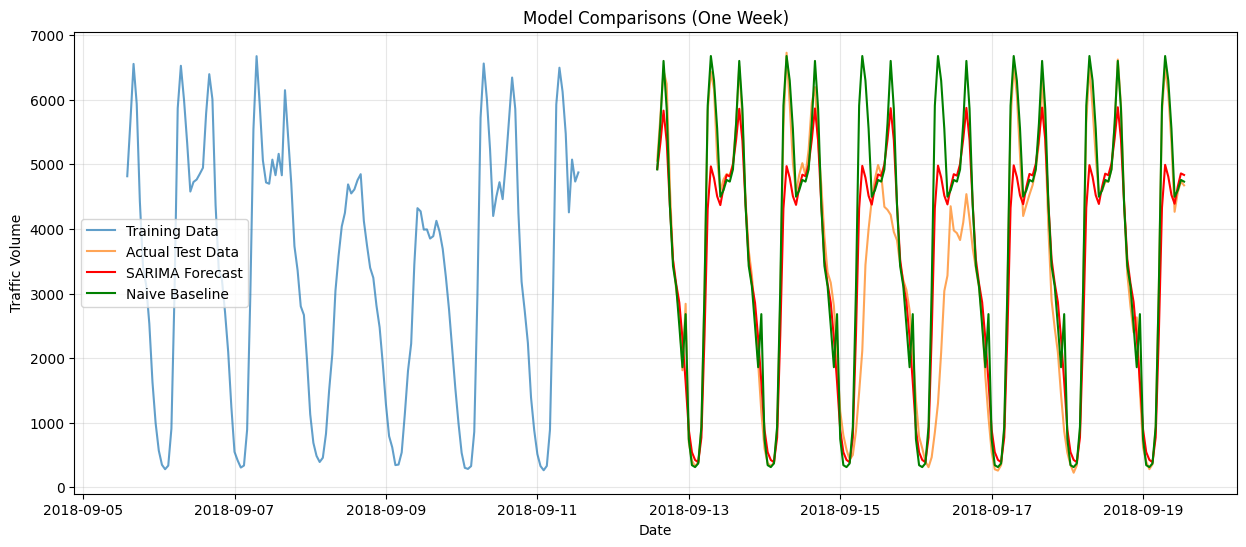

In [70]:
# 1. Simple baseline model (this will be much faster)
def naive_forecast(train, test, seasonal_period=24):
    naive_predictions = train['traffic_volume'].iloc[-seasonal_period:].values
    naive_predictions = np.tile(naive_predictions, len(test)//seasonal_period + 1)[:len(test)]
    
    # Calculate metrics
    mse_naive = mean_squared_error(test['traffic_volume'], naive_predictions)
    rmse_naive = np.sqrt(mse_naive)
    mae_naive = mean_absolute_error(test['traffic_volume'], naive_predictions)
    mape_naive = np.mean(np.abs((test['traffic_volume'] - naive_predictions) / test['traffic_volume'])) * 100
    
    print('\nBaseline Model Performance Metrics:')
    print(f'Root Mean Squared Error: {rmse_naive:.2f}')
    print(f'Mean Absolute Error: {mae_naive:.2f}')
    print(f'Mean Absolute Percentage Error: {mape_naive:.2f}%')
    
    return naive_predictions

# Generate naive forecast
naive_preds = naive_forecast(train, test)

# 2. Let's stick with our original daily SARIMA but with slight modifications
model_daily = SARIMAX(train['traffic_volume'].values,
                     order=(2, 0, 1),
                     seasonal_order=(1, 0, 1, 24),  # keeping daily seasonality only
                     enforce_stationarity=False,
                     enforce_invertibility=False)

results_daily = model_daily.fit(maxiter=200)
forecast_daily = results_daily.get_forecast(steps=len(test))
forecast_mean_daily = forecast_daily.predicted_mean

# Plot just one week of predictions for better visualization
plt.figure(figsize=(15, 6))
plt.plot(train.index[-168:-24], train['traffic_volume'][-168:-24], 
         label='Training Data', alpha=0.7)
plt.plot(test.index[:168], test['traffic_volume'][:168], 
         label='Actual Test Data', alpha=0.7)
plt.plot(test.index[:168], forecast_mean_daily[:168], 
         label='SARIMA Forecast', color='red')
plt.plot(test.index[:168], naive_preds[:168], 
         label='Naive Baseline', color='green')
plt.title('Model Comparisons (One Week)')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show() 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18025D+00    |proj g|=  1.45450D-01

At iterate    5    f=  7.08079D+00    |proj g|=  2.08574D-01

At iterate   10    f=  7.05905D+00    |proj g|=  8.40816D-03

At iterate   15    f=  7.05898D+00    |proj g|=  3.26358D-03

At iterate   20    f=  7.05893D+00    |proj g|=  1.63127D-03

At iterate   25    f=  7.05838D+00    |proj g|=  2.41595D-02

At iterate   30    f=  7.02719D+00    |proj g|=  1.64091D-01

At iterate   35    f=  7.01227D+00    |proj g|=  1.11899D-02

At iterate   40    f=  7.01183D+00    |proj g|=  2.75591D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

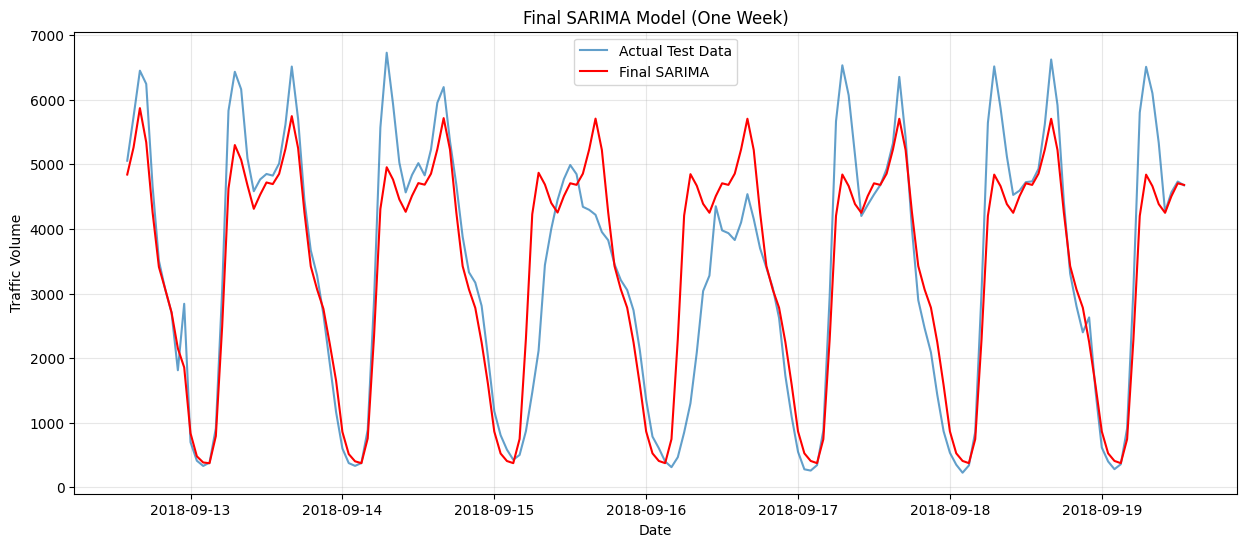


Final Model Performance Metrics:
Root Mean Squared Error: 856.93
Mean Absolute Error: 573.78
Mean Absolute Percentage Error: 29.48%


In [71]:
# Modified SARIMA with adjusted parameters
model_final = SARIMAX(train['traffic_volume'].values,
                     order=(2, 0, 2),  # added one more MA term
                     seasonal_order=(1, 1, 1, 24),  # added seasonal differencing
                     enforce_stationarity=False,
                     enforce_invertibility=False)

results_final = model_final.fit(maxiter=200)
forecast_final = results_final.get_forecast(steps=len(test))
forecast_mean_final = forecast_final.predicted_mean

# Plot comparison
plt.figure(figsize=(15, 6))
plt.plot(test.index[:168], test['traffic_volume'][:168], 
         label='Actual Test Data', alpha=0.7)
plt.plot(test.index[:168], forecast_mean_final[:168], 
         label='Final SARIMA', color='red')
plt.title('Final SARIMA Model (One Week)')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Calculate final model metrics
mse_final = mean_squared_error(test['traffic_volume'], forecast_mean_final)
rmse_final = np.sqrt(mse_final)
mae_final = mean_absolute_error(test['traffic_volume'], forecast_mean_final)
mape_final = np.mean(np.abs((test['traffic_volume'] - forecast_mean_final) / test['traffic_volume'])) * 100

print('\nFinal Model Performance Metrics:')
print(f'Root Mean Squared Error: {rmse_final:.2f}')
print(f'Mean Absolute Error: {mae_final:.2f}')
print(f'Mean Absolute Percentage Error: {mape_final:.2f}%')

In [72]:
# Apply log transformation to handle variance in peaks
train_log = train.copy()
test_log = test.copy()
train_log['traffic_volume'] = np.log1p(train_log['traffic_volume'])
test_log['traffic_volume'] = np.log1p(test_log['traffic_volume'])

# Modified SARIMA with log-transformed data
model_log = SARIMAX(train_log['traffic_volume'].values,
                    order=(2, 0, 2),
                    seasonal_order=(1, 1, 1, 24),
                    enforce_stationarity=False,
                    enforce_invertibility=False)

results_log = model_log.fit(maxiter=200)
forecast_log = results_log.get_forecast(steps=len(test))
forecast_mean_log = np.expm1(forecast_log.predicted_mean)  # Transform back

# Calculate metrics for log-transformed model
mse_log = mean_squared_error(test['traffic_volume'], forecast_mean_log)
rmse_log = np.sqrt(mse_log)
mape_log = np.mean(np.abs((test['traffic_volume'] - forecast_mean_log) / test['traffic_volume'])) * 100

print('\nLog-transformed Model Metrics:')
print(f'RMSE: {rmse_log:.2f}')
print(f'MAPE: {mape_log:.2f}%')

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.89237D-01    |proj g|=  6.44395D-01

At iterate    5    f= -5.19769D-01    |proj g|=  1.00255D-01

At iterate   10    f= -5.42770D-01    |proj g|=  1.33774D+00

At iterate   15    f= -6.45542D-01    |proj g|=  1.91175D-01

At iterate   20    f= -6.53631D-01    |proj g|=  2.52284D-02

At iterate   25    f= -6.53784D-01    |proj g|=  4.07838D-02

At iterate   30    f= -6.53797D-01    |proj g|=  6.03074D-03

At iterate   35    f= -6.53807D-01    |proj g|=  2.30907D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

In [73]:
# Add double seasonality (daily and weekly patterns)
model_double = SARIMAX(train['traffic_volume'].values,
                      order=(2, 1, 2),           # Added differencing
                      seasonal_order=(2, 1, 1, 24),  # Increased seasonal AR terms
                      enforce_stationarity=False,
                      enforce_invertibility=False)

results_double = model_double.fit(maxiter=200)
forecast_double = results_double.get_forecast(steps=len(test))
forecast_mean_double = forecast_double.predicted_mean

# Calculate metrics
mse_double = mean_squared_error(test['traffic_volume'], forecast_mean_double)
rmse_double = np.sqrt(mse_double)
mape_double = np.mean(np.abs((test['traffic_volume'] - forecast_mean_double) / test['traffic_volume'])) * 100

print('\nDouble Seasonal Model Metrics:')
print(f'RMSE: {rmse_double:.2f}')
print(f'MAPE: {mape_double:.2f}%')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.08570D+00    |proj g|=  1.26551D-01


 This problem is unconstrained.



At iterate    5    f=  7.00442D+00    |proj g|=  1.36563D-01

At iterate   10    f=  6.97321D+00    |proj g|=  4.07890D-02

At iterate   15    f=  6.97220D+00    |proj g|=  3.20142D-02

At iterate   20    f=  6.97213D+00    |proj g|=  3.90540D-03

At iterate   25    f=  6.97202D+00    |proj g|=  3.82596D-03

At iterate   30    f=  6.97201D+00    |proj g|=  9.88798D-04

At iterate   35    f=  6.97184D+00    |proj g|=  2.67491D-02

At iterate   40    f=  6.96634D+00    |proj g|=  5.54740D-02

At iterate   45    f=  6.91757D+00    |proj g|=  2.30199D-01

At iterate   50    f=  6.90092D+00    |proj g|=  4.13692D-02

At iterate   55    f=  6.89962D+00    |proj g|=  5.61557D-03

At iterate   60    f=  6.89961D+00    |proj g|=  2.63172D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/home/nando/Local/mindd/.conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/home/nando/Local/mindd/.conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.20182D+00    |proj g|=  1.28349D-01


 This problem is unconstrained.



At iterate    5    f=  7.09758D+00    |proj g|=  2.12913D-01

At iterate   10    f=  7.08404D+00    |proj g|=  9.85425D-03

At iterate   15    f=  7.08397D+00    |proj g|=  2.77889D-03

At iterate   20    f=  7.08381D+00    |proj g|=  2.26857D-03

At iterate   25    f=  7.08357D+00    |proj g|=  1.03608D-02

At iterate   30    f=  7.04366D+00    |proj g|=  1.78182D-01

At iterate   35    f=  7.03341D+00    |proj g|=  2.32967D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     39     46      1     0     0   8.943D-05   7.033D+00
  F =   7.0333982528779968     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

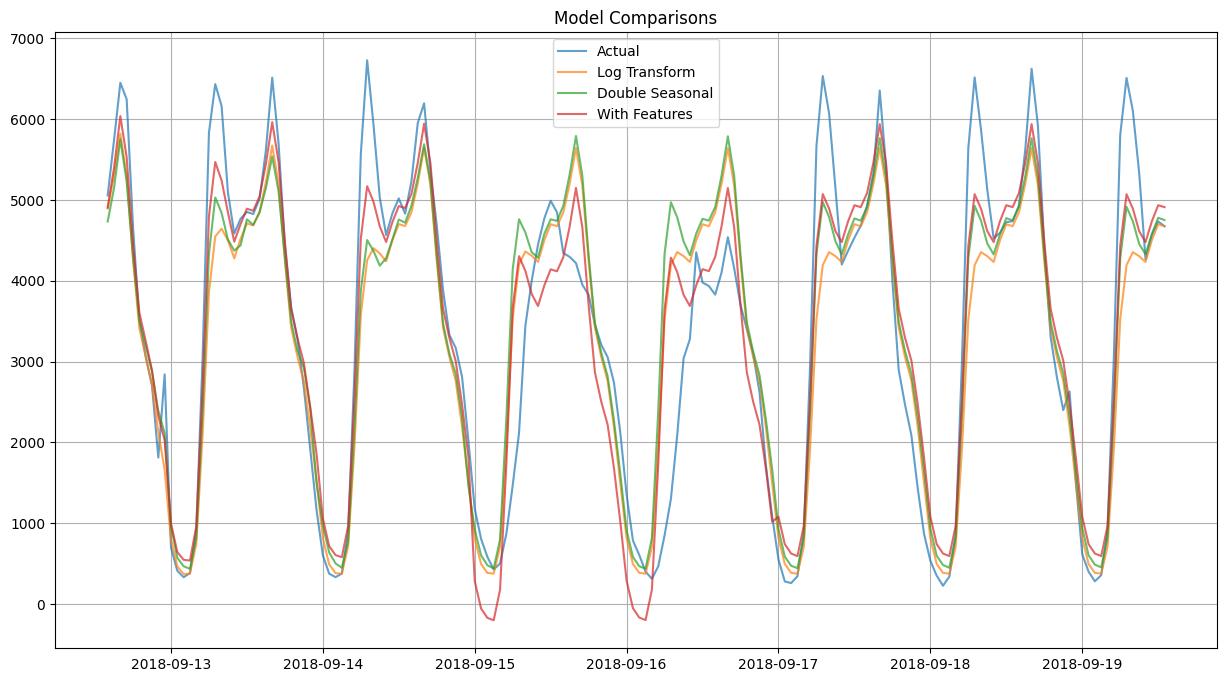

In [74]:
# Create time-based features
def add_time_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    df['is_rush_hour'] = df['hour'].isin([7,8,9,16,17,18]).astype(int)
    return df

train_features = add_time_features(train)
test_features = add_time_features(test)

# Model with external regressors
model_with_features = SARIMAX(train_features['traffic_volume'].values,
                             exog=train_features[['is_weekend', 'is_rush_hour']],
                             order=(2, 0, 2),
                             seasonal_order=(1, 1, 1, 24),
                             enforce_stationarity=False,
                             enforce_invertibility=False)

results_with_features = model_with_features.fit(maxiter=200)
forecast_with_features = results_with_features.get_forecast(
    steps=len(test),
    exog=test_features[['is_weekend', 'is_rush_hour']]
)
forecast_mean_features = forecast_with_features.predicted_mean

# Calculate metrics
mse_features = mean_squared_error(test['traffic_volume'], forecast_mean_features)
rmse_features = np.sqrt(mse_features)
mape_features = np.mean(np.abs((test['traffic_volume'] - forecast_mean_features) / test['traffic_volume'])) * 100

print('\nModel with Time Features Metrics:')
print(f'RMSE: {rmse_features:.2f}')
print(f'MAPE: {mape_features:.2f}%')

# Plot comparisons
plt.figure(figsize=(15, 8))
plt.plot(test.index[:168], test['traffic_volume'][:168], label='Actual', alpha=0.7)
plt.plot(test.index[:168], forecast_mean_log[:168], label='Log Transform', alpha=0.7)
plt.plot(test.index[:168], forecast_mean_double[:168], label='Double Seasonal', alpha=0.7)
plt.plot(test.index[:168], forecast_mean_features[:168], label='With Features', alpha=0.7)
plt.title('Model Comparisons')
plt.legend()
plt.grid(True)
plt.show()

/home/nando/Local/mindd/.conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/home/nando/Local/mindd/.conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.99686D-01    |proj g|=  7.37623D-01


 This problem is unconstrained.



At iterate    5    f= -5.24288D-01    |proj g|=  7.36114D-01

At iterate   10    f= -5.66033D-01    |proj g|=  1.54364D+00

At iterate   15    f= -6.51509D-01    |proj g|=  1.22085D-01

At iterate   20    f= -6.58180D-01    |proj g|=  4.03922D-02

At iterate   25    f= -6.58655D-01    |proj g|=  3.01072D-03

At iterate   30    f= -6.58698D-01    |proj g|=  2.71055D-03

At iterate   35    f= -6.58704D-01    |proj g|=  2.92177D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     39     52      1     0     0   9.106D-05  -6.587D-01
  F = -0.65870415081272116     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

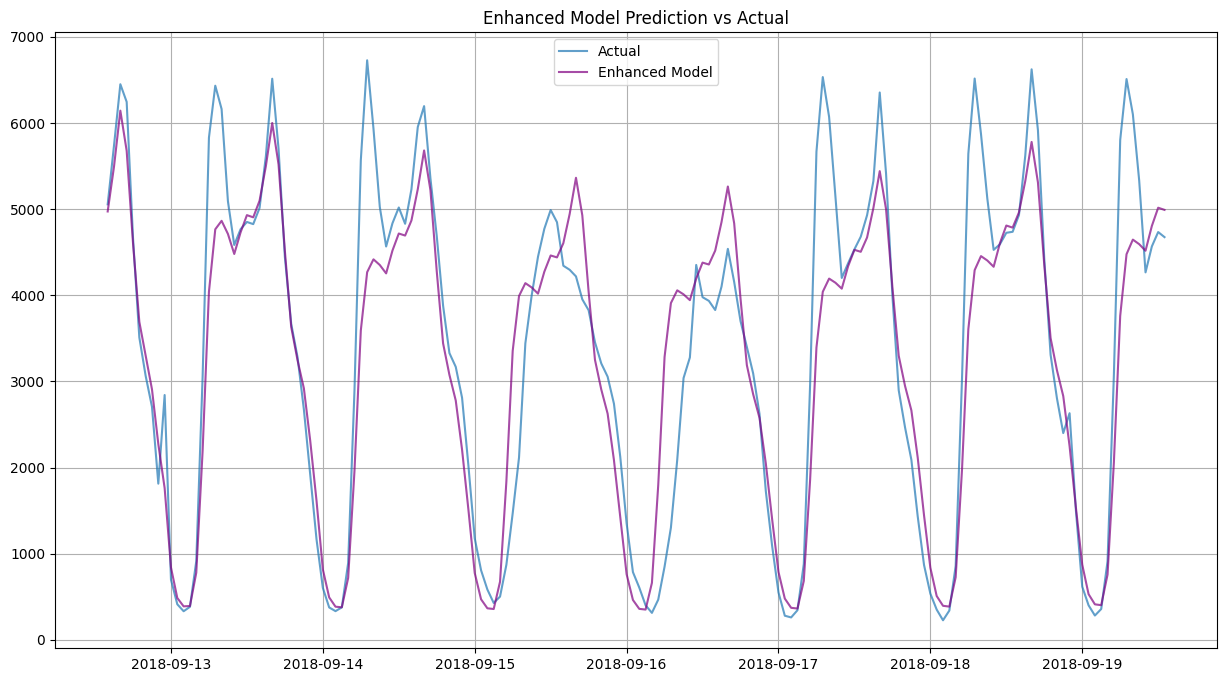

In [75]:
# Create time features but more detailed ones
def create_enhanced_features(df):
    df = df.copy()
    # Hour of day features using sine and cosine for cyclical nature
    df['hour_sin'] = np.sin(2 * np.pi * df.index.hour/24)
    df['hour_cos'] = np.cos(2 * np.pi * df.index.hour/24)
    
    # Day of week features
    df['day_sin'] = np.sin(2 * np.pi * df.index.dayofweek/7)
    df['day_cos'] = np.cos(2 * np.pi * df.index.dayofweek/7)
    
    # Peak hours as binary features
    df['morning_peak'] = df.index.hour.isin([7,8,9]).astype(int)
    df['evening_peak'] = df.index.hour.isin([16,17,18]).astype(int)
    
    return df

# Prepare data with enhanced features
train_enhanced = create_enhanced_features(train)
test_enhanced = create_enhanced_features(test)

# Combine log transformation with enhanced features
train_enhanced['traffic_volume_log'] = np.log1p(train_enhanced['traffic_volume'])

# Create model with enhanced features
model_enhanced = SARIMAX(train_enhanced['traffic_volume_log'].values,
                        exog=train_enhanced[['hour_sin', 'hour_cos', 
                                           'day_sin', 'day_cos',
                                           'morning_peak', 'evening_peak']],
                        order=(2, 0, 2),
                        seasonal_order=(1, 1, 1, 24),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

results_enhanced = model_enhanced.fit(maxiter=200)

# Make predictions
forecast_enhanced = results_enhanced.get_forecast(
    steps=len(test),
    exog=test_enhanced[['hour_sin', 'hour_cos', 
                       'day_sin', 'day_cos',
                       'morning_peak', 'evening_peak']]
)

# Transform predictions back and ensure no negative values
forecast_mean_enhanced = np.expm1(forecast_enhanced.predicted_mean)
forecast_mean_enhanced = np.maximum(0, forecast_mean_enhanced)  # Ensure no negative values

# Calculate metrics
mse_enhanced = mean_squared_error(test['traffic_volume'], forecast_mean_enhanced)
rmse_enhanced = np.sqrt(mse_enhanced)
mape_enhanced = np.mean(np.abs((test['traffic_volume'] - forecast_mean_enhanced) / test['traffic_volume'])) * 100

print('\nEnhanced Model Metrics:')
print(f'RMSE: {rmse_enhanced:.2f}')
print(f'MAPE: {mape_enhanced:.2f}%')

# Plot results
plt.figure(figsize=(15, 8))
plt.plot(test.index[:168], test['traffic_volume'][:168], label='Actual', alpha=0.7)
plt.plot(test.index[:168], forecast_mean_enhanced[:168], label='Enhanced Model', color='purple', alpha=0.7)
plt.title('Enhanced Model Prediction vs Actual')
plt.legend()
plt.grid(True)
plt.show()

/home/nando/Local/mindd/.conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/home/nando/Local/mindd/.conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.99686D-01    |proj g|=  7.37623D-01


 This problem is unconstrained.



At iterate    5    f= -5.24288D-01    |proj g|=  7.36114D-01

At iterate   10    f= -5.66033D-01    |proj g|=  1.54364D+00

At iterate   15    f= -6.51509D-01    |proj g|=  1.22085D-01

At iterate   20    f= -6.58180D-01    |proj g|=  4.03922D-02

At iterate   25    f= -6.58655D-01    |proj g|=  3.01072D-03

At iterate   30    f= -6.58698D-01    |proj g|=  2.71055D-03

At iterate   35    f= -6.58704D-01    |proj g|=  2.92177D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     39     52      1     0     0   9.106D-05  -6.587D-01
  F = -0.65870415081272116     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

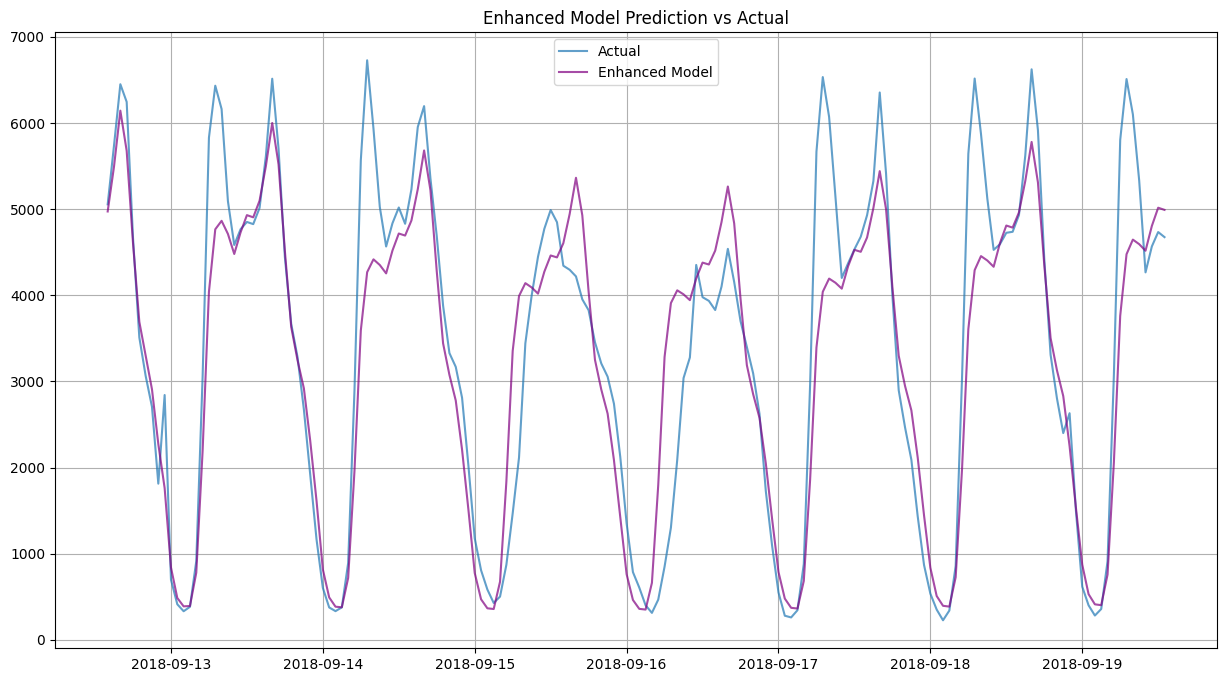

In [76]:
# Create time features but more detailed ones
def create_enhanced_features(df):
    df = df.copy()
    # Hour of day features using sine and cosine for cyclical nature
    df['hour_sin'] = np.sin(2 * np.pi * df.index.hour/24)
    df['hour_cos'] = np.cos(2 * np.pi * df.index.hour/24)
    
    # Day of week features
    df['day_sin'] = np.sin(2 * np.pi * df.index.dayofweek/7)
    df['day_cos'] = np.cos(2 * np.pi * df.index.dayofweek/7)
    
    # Peak hours as binary features
    df['morning_peak'] = df.index.hour.isin([7,8,9]).astype(int)
    df['evening_peak'] = df.index.hour.isin([16,17,18]).astype(int)
    
    return df

# Prepare data with enhanced features
train_enhanced = create_enhanced_features(train)
test_enhanced = create_enhanced_features(test)

# Combine log transformation with enhanced features
train_enhanced['traffic_volume_log'] = np.log1p(train_enhanced['traffic_volume'])

# Create model with enhanced features
model_enhanced = SARIMAX(train_enhanced['traffic_volume_log'].values,
                        exog=train_enhanced[['hour_sin', 'hour_cos', 
                                           'day_sin', 'day_cos',
                                           'morning_peak', 'evening_peak']],
                        order=(2, 0, 2),
                        seasonal_order=(1, 1, 1, 24),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

results_enhanced = model_enhanced.fit(maxiter=200)

# Make predictions
forecast_enhanced = results_enhanced.get_forecast(
    steps=len(test),
    exog=test_enhanced[['hour_sin', 'hour_cos', 
                       'day_sin', 'day_cos',
                       'morning_peak', 'evening_peak']]
)

# Transform predictions back and ensure no negative values
forecast_mean_enhanced = np.expm1(forecast_enhanced.predicted_mean)
forecast_mean_enhanced = np.maximum(0, forecast_mean_enhanced)  # Ensure no negative values

# Calculate metrics
mse_enhanced = mean_squared_error(test['traffic_volume'], forecast_mean_enhanced)
rmse_enhanced = np.sqrt(mse_enhanced)
mape_enhanced = np.mean(np.abs((test['traffic_volume'] - forecast_mean_enhanced) / test['traffic_volume'])) * 100

print('\nEnhanced Model Metrics:')
print(f'RMSE: {rmse_enhanced:.2f}')
print(f'MAPE: {mape_enhanced:.2f}%')

# Plot results
plt.figure(figsize=(15, 8))
plt.plot(test.index[:168], test['traffic_volume'][:168], label='Actual', alpha=0.7)
plt.plot(test.index[:168], forecast_mean_enhanced[:168], label='Enhanced Model', color='purple', alpha=0.7)
plt.title('Enhanced Model Prediction vs Actual')
plt.legend()
plt.grid(True)
plt.show()

/home/nando/Local/mindd/.conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/home/nando/Local/mindd/.conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.99686D-01    |proj g|=  7.37623D-01


 This problem is unconstrained.



At iterate    5    f= -5.24288D-01    |proj g|=  7.36114D-01

At iterate   10    f= -5.66033D-01    |proj g|=  1.54364D+00

At iterate   15    f= -6.51509D-01    |proj g|=  1.22085D-01

At iterate   20    f= -6.58180D-01    |proj g|=  4.03922D-02

At iterate   25    f= -6.58655D-01    |proj g|=  3.01072D-03

At iterate   30    f= -6.58698D-01    |proj g|=  2.71055D-03

At iterate   35    f= -6.58704D-01    |proj g|=  2.92177D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     39     52      1     0     0   9.106D-05  -6.587D-01
  F = -0.65870415081272116     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

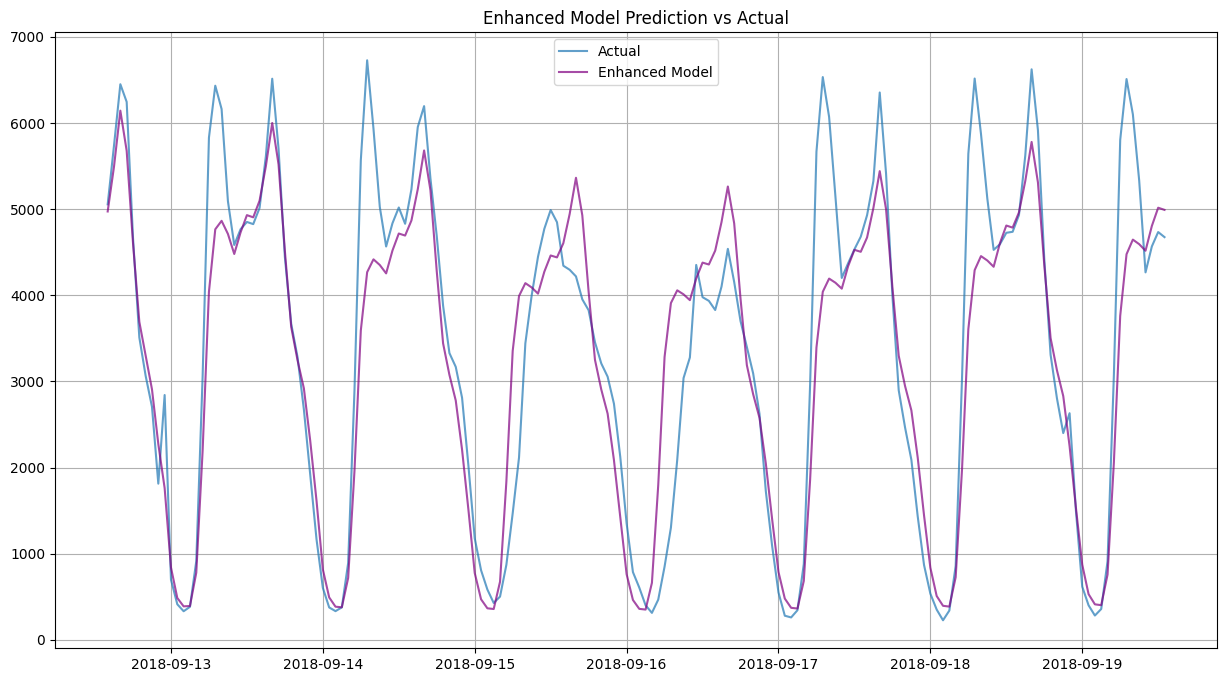

In [77]:
# Create time features but more detailed ones
def create_enhanced_features(df):
    df = df.copy()
    # Hour of day features using sine and cosine for cyclical nature
    df['hour_sin'] = np.sin(2 * np.pi * df.index.hour/24)
    df['hour_cos'] = np.cos(2 * np.pi * df.index.hour/24)
    
    # Day of week features
    df['day_sin'] = np.sin(2 * np.pi * df.index.dayofweek/7)
    df['day_cos'] = np.cos(2 * np.pi * df.index.dayofweek/7)
    
    # Peak hours as binary features
    df['morning_peak'] = df.index.hour.isin([7,8,9]).astype(int)
    df['evening_peak'] = df.index.hour.isin([16,17,18]).astype(int)
    
    return df

# Prepare data with enhanced features
train_enhanced = create_enhanced_features(train)
test_enhanced = create_enhanced_features(test)

# Combine log transformation with enhanced features
train_enhanced['traffic_volume_log'] = np.log1p(train_enhanced['traffic_volume'])

# Create model with enhanced features
model_enhanced = SARIMAX(train_enhanced['traffic_volume_log'].values,
                        exog=train_enhanced[['hour_sin', 'hour_cos', 
                                           'day_sin', 'day_cos',
                                           'morning_peak', 'evening_peak']],
                        order=(2, 0, 2),
                        seasonal_order=(1, 1, 1, 24),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

results_enhanced = model_enhanced.fit(maxiter=200)

# Make predictions
forecast_enhanced = results_enhanced.get_forecast(
    steps=len(test),
    exog=test_enhanced[['hour_sin', 'hour_cos', 
                       'day_sin', 'day_cos',
                       'morning_peak', 'evening_peak']]
)

# Transform predictions back and ensure no negative values
forecast_mean_enhanced = np.expm1(forecast_enhanced.predicted_mean)
forecast_mean_enhanced = np.maximum(0, forecast_mean_enhanced)  # Ensure no negative values

# Calculate metrics
mse_enhanced = mean_squared_error(test['traffic_volume'], forecast_mean_enhanced)
rmse_enhanced = np.sqrt(mse_enhanced)
mape_enhanced = np.mean(np.abs((test['traffic_volume'] - forecast_mean_enhanced) / test['traffic_volume'])) * 100

print('\nEnhanced Model Metrics:')
print(f'RMSE: {rmse_enhanced:.2f}')
print(f'MAPE: {mape_enhanced:.2f}%')

# Plot results
plt.figure(figsize=(15, 8))
plt.plot(test.index[:168], test['traffic_volume'][:168], label='Actual', alpha=0.7)
plt.plot(test.index[:168], forecast_mean_enhanced[:168], label='Enhanced Model', color='purple', alpha=0.7)
plt.title('Enhanced Model Prediction vs Actual')
plt.legend()
plt.grid(True)
plt.show()

/home/nando/Local/mindd/.conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/home/nando/Local/mindd/.conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.77196D-01    |proj g|=  7.42855D-01


 This problem is unconstrained.



At iterate    5    f= -5.32440D-01    |proj g|=  1.79699D-01

At iterate   10    f= -6.19319D-01    |proj g|=  9.83156D-01

At iterate   15    f= -6.54085D-01    |proj g|=  8.71550D-02

At iterate   20    f= -6.59145D-01    |proj g|=  8.72942D-02

At iterate   25    f= -6.60062D-01    |proj g|=  1.15527D-02

At iterate   30    f= -6.60131D-01    |proj g|=  2.94504D-03

At iterate   35    f= -6.60145D-01    |proj g|=  2.35738D-03

At iterate   40    f= -6.60150D-01    |proj g|=  7.34467D-03

At iterate   45    f= -6.60154D-01    |proj g|=  1.06871D-03

At iterate   50    f= -6.60155D-01    |proj g|=  8.73992D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

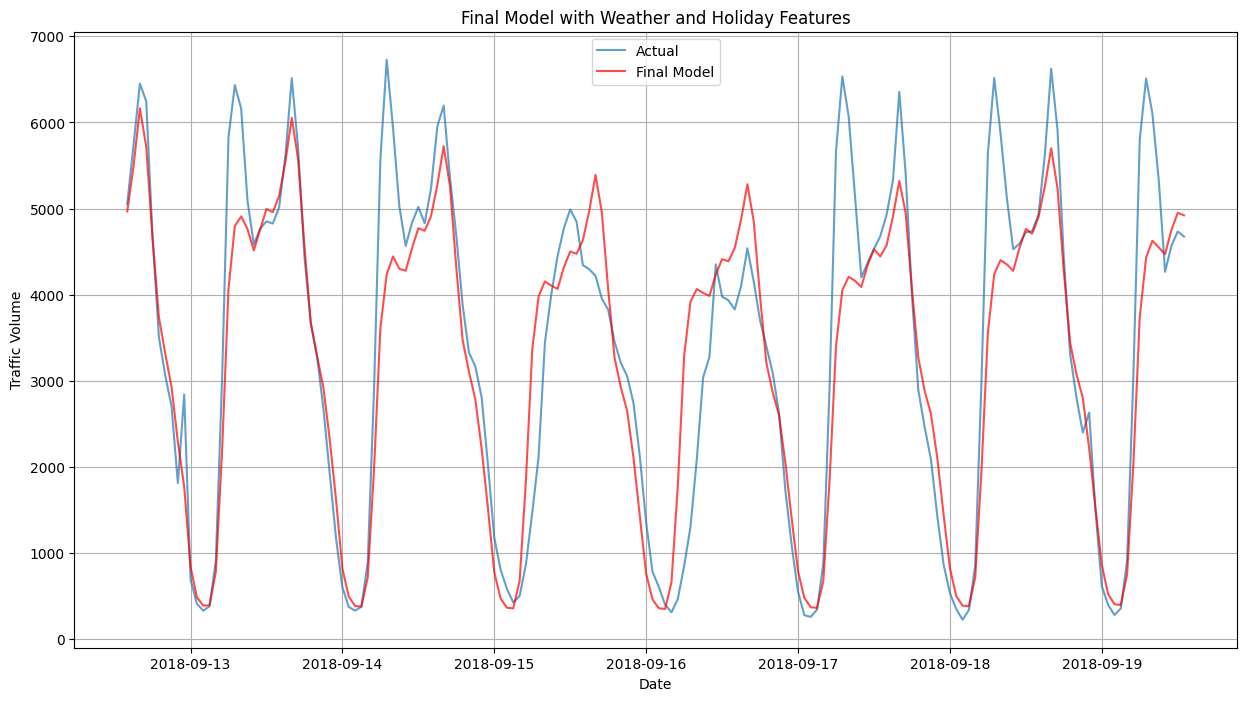


Model Summary:
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
hour_sin           -6.548e-07   6006.336  -1.09e-10      1.000   -1.18e+04    1.18e+04
hour_cos            5.603e-07   1755.275   3.19e-10      1.000   -3440.276    3440.276
day_sin                0.0626      0.015      4.314      0.000       0.034       0.091
day_cos               -0.0380      0.012     -3.048      0.002      -0.063      -0.014
early_morning_peak -2.243e-07   1219.281  -1.84e-10      1.000   -2389.747    2389.747
late_morning_peak   7.525e-08   1008.979   7.46e-11      1.000   -1977.562    1977.562
early_evening_peak -3.276e-08    350.596  -9.34e-11      1.000    -687.156     687.156
late_evening_peak  -3.478e-08    241.895  -1.44e-10      1.000    -474.106     474.106
is_rain               -0.0056      0.030     -0.185      0.853      -0.065       0.053
heavy_clouds          -0.01

In [79]:
# Create a more comprehensive feature set
def create_full_features(df):
    df = df.copy()
    
    # Time-based features (keeping the cyclic encoding)
    df['hour_sin'] = np.sin(2 * np.pi * df.index.hour/24)
    df['hour_cos'] = np.cos(2 * np.pi * df.index.hour/24)
    df['day_sin'] = np.sin(2 * np.pi * df.index.dayofweek/7)
    df['day_cos'] = np.cos(2 * np.pi * df.index.dayofweek/7)
    
    # More specific peak hour features
    df['early_morning_peak'] = df.index.hour.isin([7,8]).astype(int)
    df['late_morning_peak'] = df.index.hour.isin([9,10]).astype(int)
    df['early_evening_peak'] = df.index.hour.isin([16,17]).astype(int)
    df['late_evening_peak'] = df.index.hour.isin([18,19]).astype(int)
    
    # Weather features
    df['is_rain'] = (df['rain_1h'] > 0).astype(int)
    df['heavy_clouds'] = (df['clouds_all'] > 80).astype(int)
    
    # Holiday impact
    df['is_holiday'] = (df['holiday'] != 'no_holiday').astype(int)
    
    # Temperature bins (converting Kelvin to Celsius first)
    df['temp_celsius'] = df['temp'] - 273.15
    df['temp_high'] = (df['temp_celsius'] > 25).astype(int)
    df['temp_low'] = (df['temp_celsius'] < 0).astype(int)
    
    return df

# Prepare enhanced data
train_full = create_full_features(train)
test_full = create_full_features(test)

# Log transform the target
train_full['traffic_volume_log'] = np.log1p(train_full['traffic_volume'])

# Select features for the model
feature_columns = ['hour_sin', 'hour_cos', 'day_sin', 'day_cos',
                  'early_morning_peak', 'late_morning_peak',
                  'early_evening_peak', 'late_evening_peak',
                  'is_rain', 'heavy_clouds',
                  'is_holiday', 'temp_high', 'temp_low']

# Create final model
model_final = SARIMAX(train_full['traffic_volume_log'].values,
                     exog=train_full[feature_columns],
                     order=(2, 0, 2),
                     seasonal_order=(1, 1, 1, 24),
                     enforce_stationarity=False,
                     enforce_invertibility=False)

results_final = model_final.fit(maxiter=200)

# Make predictions
forecast_final = results_final.get_forecast(
    steps=len(test),
    exog=test_full[feature_columns]
)

# Transform predictions back and ensure no negative values
forecast_mean_final = np.expm1(forecast_final.predicted_mean)
forecast_mean_final = np.maximum(0, forecast_mean_final)

# Calculate metrics
mse_final = mean_squared_error(test['traffic_volume'], forecast_mean_final)
rmse_final = np.sqrt(mse_final)
mape_final = np.mean(np.abs((test['traffic_volume'] - forecast_mean_final) / test['traffic_volume'])) * 100

print('\nFinal Model Performance Metrics:')
print(f'RMSE: {rmse_final:.2f}')
print(f'MAPE: {mape_final:.2f}%')

# Plot results for one week
plt.figure(figsize=(15, 8))
plt.plot(test.index[:168], test['traffic_volume'][:168], label='Actual', alpha=0.7)
plt.plot(test.index[:168], forecast_mean_final[:168], label='Final Model', color='red', alpha=0.7)
plt.title('Final Model with Weather and Holiday Features')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()

# Print summary of important coefficients
print("\nModel Summary:")
print(results_final.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.67755D-01    |proj g|=  3.74582D-01


 This problem is unconstrained.



At iterate    5    f= -5.00650D-01    |proj g|=  2.72328D+00

At iterate   10    f= -5.65182D-01    |proj g|=  1.91108D-01

At iterate   15    f= -6.34331D-01    |proj g|=  6.23942D-01

At iterate   20    f= -6.62740D-01    |proj g|=  9.60805D-02

At iterate   25    f= -6.65406D-01    |proj g|=  2.05123D-02

At iterate   30    f= -6.65492D-01    |proj g|=  3.22854D-03

At iterate   35    f= -6.65511D-01    |proj g|=  4.60186D-03

At iterate   40    f= -6.65518D-01    |proj g|=  7.86627D-04

At iterate   45    f= -6.65518D-01    |proj g|=  5.99128D-04

At iterate   50    f= -6.65518D-01    |proj g|=  6.34567D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

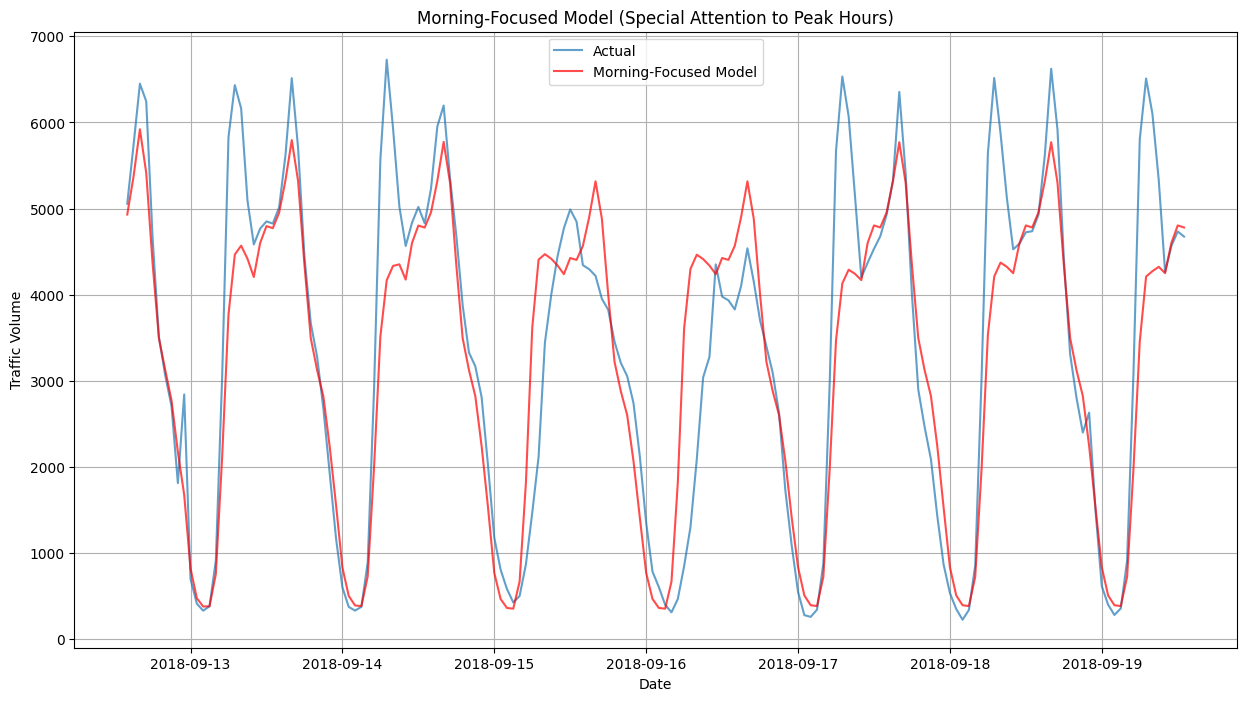


Morning Hours Impact:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3.176e-07   4796.827  -6.62e-11      1.000   -9401.608    9401.608
x2          3.994e-07   2159.449   1.85e-10      1.000   -4232.443    4232.443
x3             0.0820      0.013      6.073      0.000       0.056       0.108
x4            -0.1215      0.033     -3.693      0.000      -0.186      -0.057
x5         -1.518e-07   1354.659  -1.12e-10      1.000   -2655.083    2655.083
x6         -1.134e-07    792.401  -1.43e-10      1.000   -1553.077    1553.077
x7         -7.124e-08    279.454  -2.55e-10      1.000    -547.719     547.719
x8         -1.805e-08    265.641  -6.79e-11      1.000    -520.647     520.647
x9          2.582e-08    460.313   5.61e-11      1.000    -902.197     902.197
x10            0.0231      0.037      0.628      0.530      -0.049       0.095
x11           -0.0040      0.

In [83]:
# Create features with more emphasis on morning patterns
def create_morning_focused_features(df):
    df = df.copy()
    
    # More granular morning hours (6AM to 10AM in 1-hour intervals)
    for hour in range(6, 11):
        df[f'hour_{hour}'] = (df.index.hour == hour).astype(float)  # Changed to float
    
    # Workday vs weekend feature
    df['is_workday'] = (~df.index.dayofweek.isin([5, 6])).astype(float)  # Changed to float
    
    # Interaction between workday and morning hours
    df['workday_morning'] = ((df.index.hour.isin(range(6, 11))) & 
                            (~df.index.dayofweek.isin([5, 6]))).astype(float)  # Changed to float
    
    # Keep the cyclical features for general daily pattern
    df['hour_sin'] = np.sin(2 * np.pi * df.index.hour/24)
    df['hour_cos'] = np.cos(2 * np.pi * df.index.hour/24)
    
    # Weather impacts during morning hours - convert boolean to float
    df['morning_rain'] = ((df['rain_1h'] > 0) & 
                         (df.index.hour.isin(range(6, 11)))).astype(float)  # Changed to float
    df['morning_clouds'] = ((df['clouds_all'] > 80) & 
                          (df.index.hour.isin(range(6, 11)))).astype(float)  # Changed to float
    
    return df

# Prepare data with morning-focused features
train_morning = create_morning_focused_features(train)
test_morning = create_morning_focused_features(test)

# Log transform the target
train_morning['traffic_volume_log'] = np.log1p(train_morning['traffic_volume'])

# Select features
morning_features = ['hour_sin', 'hour_cos', 'is_workday', 'workday_morning',
                   'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
                   'morning_rain', 'morning_clouds']

# Verify all features are numeric
for feature in morning_features:
    train_morning[feature] = train_morning[feature].astype(float)
    test_morning[feature] = test_morning[feature].astype(float)

# Create morning-focused model
model_morning = SARIMAX(train_morning['traffic_volume_log'].values,
                       exog=train_morning[morning_features].astype(float).values,  # Added .values
                       order=(2, 0, 2),
                       seasonal_order=(1, 1, 1, 24),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

results_morning = model_morning.fit(maxiter=200)

# Make predictions
forecast_morning = results_morning.get_forecast(
    steps=len(test),
    exog=test_morning[morning_features]
)

# Transform predictions back
forecast_mean_morning = np.expm1(forecast_morning.predicted_mean)
forecast_mean_morning = np.maximum(0, forecast_mean_morning)

# Calculate metrics
mse_morning = mean_squared_error(test['traffic_volume'], forecast_mean_morning)
rmse_morning = np.sqrt(mse_morning)
mape_morning = np.mean(np.abs((test['traffic_volume'] - forecast_mean_morning) / test['traffic_volume'])) * 100

print('\nMorning-Focused Model Metrics:')
print(f'RMSE: {rmse_morning:.2f}')
print(f'MAPE: {mape_morning:.2f}%')

# Plot results focusing on morning hours (6 AM to 10 AM)
plt.figure(figsize=(15, 8))
plt.plot(test.index[:168], test['traffic_volume'][:168], label='Actual', alpha=0.7)
plt.plot(test.index[:168], forecast_mean_morning[:168], label='Morning-Focused Model', color='red', alpha=0.7)
plt.title('Morning-Focused Model (Special Attention to Peak Hours)')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()

# Print morning hours coefficients
print("\nMorning Hours Impact:")
print(results_morning.summary().tables[1])

# Model Evaluation